<a href="https://colab.research.google.com/github/hyo2/5emotion_preprocessing/blob/master/5emotion_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 한글폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 0. 데이터 확인
-감성대화셋 -> train이랑 valid 확인

In [ ]:
import pandas as pd

In [ ]:
# 감성대화셋 training, validation 데이터 확인
emotion_train_origin = pd.read_excel('/content/drive/MyDrive/new_mood/emotion_data/감성대화말뭉치(최종데이터)_Training.xlsx')
emotion_valid_origin = pd.read_excel('/content/drive/MyDrive/new_mood/emotion_data/감성대화말뭉치(최종데이터)_Validation.xlsx')

In [ ]:
# 5개의 데이터 샘플 출력
emotion_train_origin.head()

,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4
0,44164,청년,남성,"연애, 결혼, 출산",해당없음,기쁨,신이 난,아내가 드디어 출산하게 되어서 정말 신이 나.,아내분이 출산을 하시는군요. 정말 축하드려요.,아 지금 정말 신이 나.,잘 된 일이네요.,아기가 점점 클게 벌써 기대가 되네. 내가 많이 놀아줘야지.,좋은 아빠가 되실 거 같아요. 진심으로 축하드려요.,NaN,NaN
1,3926,노년,남성,"건강, 죽음",만성질환 유,불안,스트레스 받는,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,약 종류가 많아 번거로우시겠어요.,건강할 때 관리 좀 잘할걸 하는 생각이 들더라고.,현재 상황에서 변화를 주기 위해 어떻게 하면 될까요?,약을 잘 챙겨 먹고 나을 수 있도록 노력해야지.,약을 잘 챙겨 먹어 건강해지시길 바랄게요.,NaN,NaN
2,50882,청소년,여성,학업 및 진로,해당없음,당황,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,고등학교 수업이 중학교 때와는 다르게 갑자기 어려워서 당황스러우시군요.,아직 학기 초인데 내가 수업에 잘 따라갈 수 있을지 걱정돼.,이 상황에서 할 수 있는 게 어떤 것이 있을까요?,중학교 수업을 들을 때보다 훨씬 더 열심히 할 거야.,수업을 어떤 방식으로 열심히 듣는게 좋을까요?,선생님이 강조하신 부분을 필기하고 집에서 매일 수업 내용을 복습하려고 해.,열심히 해서 좋은 결과가 있었으면 좋겠어요.
3,31303,노년,남성,재정,만성질환 무,기쁨,신이 난,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.,재취업 후 첫 월급이라 정말 기쁘시겠어요.,퇴직 후 다시는 돈을 못 벌 줄 알았는데 이렇게 월급으로 가족에게 맛있는 밥을 살 ...,이 기분을 유지하려면 어떻게 해야 할까요?,회사생활을 열심히 해서 계속 월급을 받을거야!,계속 원하시는 대로 회사생활이 이어지길 바랄게요.,NaN,NaN
4,47200,노년,여성,재정,만성질환 유,기쁨,안도,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.,기분 좋으시겠어요. 앞으로는 어떻게 하실 생각이신가요?,빚도 다 갚았으니 당분간은 아무 생각도 안 하며 살고 싶어.,빚도 다 갚았으니 당분간은 아무 생각도 안 하며 살고 싶으시군요.,NaN,NaN,NaN,NaN


In [ ]:
# 5개의 데이터 샘플 출력
emotion_valid_origin.head()

,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4
0,23093,청년,여성,"진로, 취업, 직장",해당없음,분노,툴툴대는,요즘 부모님과 많이 부딪혀.,어떤 일로 부딪히시나요?,난 하고 싶은 일이 있는데 부모님은 안정적인 일만 하라고 하셔. 내 마음대로 하지도...,부모님과의 충돌로 힘드시겠군요.,응. 그래도 난 내가 하고 싶은 일을 위해 노력할 거야.,자신이 하고 싶은 일을 목표로 하기로 하셨군요.,NaN,NaN
1,32848,청소년,남성,가족관계,해당없음,슬픔,비통한,엄마가 결국 집을 나갔어. 너무 너무 슬퍼.,어머니께서 집을 나가셨다니 정말 슬프셨겠어요. 좀 더 자세히 얘기해주시겠어요?,엄마도 엄마만의 인생이 있을 테니 가지 말라고 할 수가 없었어. 그래서 더 마음이 ...,정말 많이 답답하셨겠어요. 어떻게 하는 게 기분이 좀 풀릴까요?,일단 좀 자야겠어.,일단 휴식을 가질 생각이시군요.,NaN,NaN
2,35590,청소년,남성,학교폭력/따돌림,해당없음,불안,조심스러운,학교에서 한 친구를 괴롭히는 무리에게 그만하라고 했어.,용기 있는 행동을 하셨네요. 마음이 어떠셨나요?,그런데 말을 하고 난 후 나도 괴롭힐까 봐 불안했어.,그랬군요. 지금 기분에서 벗어나기 위해 할 수 있는 일에는 무엇이 있을까요?,나는 옳은 일을 한 거라고 생각해. 나까지 괴롭힌다면 신고할 거야.,지금의 상황이 나의 방식으로써 잘 해결될 수 있기를 바라요.,NaN,NaN
3,169,청년,남성,"진로, 취업, 직장",해당없음,당황,죄책감의,이번에 팀장님이 간단한 조사 업무를 부탁하셨는데 내가 잘못 처리했어. 너무 절망적이야.,팀장님이 부탁하신 업무를 잘못 처리하셔서 많이 당황하시고 놀라셨겠어요.,곧 있으면 인턴에서 정규직 전환 평가가 있는데 안 좋을 것 같아.,마음이 많이 안 좋으시겠어요. 지금 상황을 타개할 수 있는 가장 좋은 방안이 있을까요?,우선 잘못된 부분을 솔직하게 말씀드리고 수정하기 위해서 최선을 다해봐야겠어.,잘못된 부분을 잘 수정해서 좋은 결과가 있었으면 좋겠어요.,NaN,NaN
4,38435,중년,여성,"재정, 은퇴, 노후준비",해당없음,분노,노여워하는,남편이 이혼할 때 위자료를 주지 않으려고 변호사를 고용했어.,많이 화가 나시겠어요.,어떻게 그럴 수가 있지? 너무 화가 나.,어떻게 하면 지금의 감정을 추스를 수 있을까요?,나도 변호사를 고용해서 한번 얘기해보려고 해.,자녀분들이랑 함께 하며 슬픔을 극복하시길 바라요.,NaN,NaN


In [ ]:
# dataframe의 정보를 요약해서 출력
emotion_train_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40879 entries, 0 to 40878
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      40879 non-null  int64 
 1   연령      40879 non-null  object
 2   성별      40879 non-null  object
 3   상황키워드   40879 non-null  object
 4   신체질환    40879 non-null  object
 5   감정_대분류  40879 non-null  object
 6   감정_소분류  40879 non-null  object
 7   사람문장1   40879 non-null  object
 8   시스템응답1  40879 non-null  object
 9   사람문장2   40879 non-null  object
 10  시스템응답2  40879 non-null  object
 11  사람문장3   31059 non-null  object
 12  시스템응답3  31059 non-null  object
 13  사람문장4   1472 non-null   object
 14  시스템응답4  1362 non-null   object
dtypes: int64(1), object(14)
memory usage: 4.7+ MB


In [ ]:
# dataframe의 정보를 요약해서 출력
emotion_valid_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5130 entries, 0 to 5129
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      5130 non-null   int64 
 1   연령      5130 non-null   object
 2   성별      5130 non-null   object
 3   상황키워드   5130 non-null   object
 4   신체질환    5130 non-null   object
 5   감정_대분류  5130 non-null   object
 6   감정_소분류  5130 non-null   object
 7   사람문장1   5130 non-null   object
 8   시스템응답1  5130 non-null   object
 9   사람문장2   5130 non-null   object
 10  시스템응답2  5130 non-null   object
 11  사람문장3   3874 non-null   object
 12  시스템응답3  3874 non-null   object
 13  사람문장4   151 non-null    object
 14  시스템응답4  136 non-null    object
dtypes: int64(1), object(14)
memory usage: 601.3+ KB


In [ ]:
# print(emotion_train_origin[emotion_train_origin['감정_대분류']=='분노'])
# print(emotion_train_origin[emotion_train_origin['감정_대분류']=='슬픔'])
# print(emotion_train_origin[emotion_train_origin['감정_대분류']=='당황'])
print(emotion_train_origin[emotion_train_origin['감정_대분류']=='기쁨'])

          번호  연령  성별        상황키워드    신체질환 감정_대분류 감정_소분류  \
0      44164  청년  남성   연애, 결혼, 출산    해당없음     기쁨   신이 난   
3      31303  노년  남성           재정  만성질환 무     기쁨   신이 난   
4      47200  노년  여성           재정  만성질환 유     기쁨     안도   
14      1679  노년  여성       건강, 죽음  만성질환 유     기쁨     안도   
23     41925  청년  남성         대인관계    해당없음     기쁨     흥분   
...      ...  ..  ..          ...     ...    ...    ...   
40856  33890  노년  여성           재정  만성질환 무     기쁨     안도   
40857   3384  중년  여성  직장, 업무 스트레스    해당없음     기쁨   신이 난   
40867  37622  청년  여성   진로, 취업, 직장    해당없음     기쁨     느긋   
40875  48959  중년  남성           건강    해당없음     기쁨     안도   
40877  14197  노년  여성           재정  만성질환 무     기쁨   감사하는   

                                               사람문장1  \
0                          아내가 드디어 출산하게 되어서 정말 신이 나.   
3      재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.   
4                       빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.   
14      남편이 죽기 전에 손자들 얼굴 보고 싶다고 했는데 다행히 늦지 않아서 안도했어.   
23         

In [ ]:
print(len(emotion_valid_origin[emotion_valid_origin['감정_대분류']=='분노']))
print(len(emotion_valid_origin[emotion_valid_origin['감정_대분류']=='슬픔']))
print(len(emotion_valid_origin[emotion_valid_origin['감정_대분류']=='당황']))
print(len(emotion_valid_origin[emotion_valid_origin['감정_대분류']=='기쁨']))

873
861
832
841


# 1. 데이터 읽기

**1. 데이터 읽기**

-데이터 읽고 dataframe 형태로 저장

- 한국어 단발성 대화셋
- 한국어 연속성 대화셋
- 감성 대화셋-training, validation

In [ ]:
import pandas as pd

In [ ]:
# 한국어 단발성 대화셋
emotion1_origin = pd.read_excel('/content/drive/MyDrive/new_mood/emotion_data/한국어_단발성_대화_데이터셋.xlsx')
# 한국어 연속성 대화셋
emotion2_origin = pd.read_excel('/content/drive/MyDrive/new_mood/emotion_data/한국어_연속적_대화_데이터셋.xlsx')
# 감성대화셋-training
emotion3_origin = pd.read_excel('/content/drive/MyDrive/new_mood/emotion_data/감성대화말뭉치(최종데이터)_Training.xlsx')
# 감성대화셋-validation
emotion4_origin = pd.read_excel('/content/drive/MyDrive/new_mood/emotion_data/감성대화말뭉치(최종데이터)_Validation.xlsx')

In [ ]:
# 5개의 데이터 샘플을 출력
emotion1_origin.head()

,Sentence,Emotion,Unnamed: 2,Unnamed: 3,Unnamed: 4,공포,5468
0,언니 동생으로 부르는게 맞는 일인가요..??,공포,NaN,NaN,NaN,놀람,5898.0
1,그냥 내 느낌일뿐겠지?,공포,NaN,NaN,NaN,분노,5665.0
2,아직너무초기라서 그런거죠?,공포,NaN,NaN,NaN,슬픔,5267.0
3,유치원버스 사고 낫다던데,공포,NaN,NaN,NaN,중립,4830.0
4,근데 원래이런거맞나요,공포,NaN,NaN,NaN,행복,6037.0


In [ ]:
# 5개의 데이터 샘플을 출력
emotion2_origin.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,행복,중립,슬픔,공포,혐오,분노,놀람,Unnamed: 12
0,dialog #,발화,감정,NaN,NaN,1030.0,43786.0,1972.0,98.0,220.0,3628.0,4866.0,55600.0
1,S,아 진짜! 사무실에서 피지 말라니깐! 간접흡연이 얼마나 안좋은데!,분노,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,그럼 직접흡연하는 난 얼마나 안좋겠니? 안그래? 보면 꼭... 지 생각만 하고.,혐오,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,손님 왔어요.,중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,손님? 누구?,중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# dataframe의 정보를 요약해서 출력
emotion1_origin.info()
emotion2_origin.info()
emotion3_origin.info()
emotion4_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38594 entries, 0 to 38593
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sentence    38594 non-null  object 
 1   Emotion     38594 non-null  object 
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
 5   공포          7 non-null      object 
 6   5468        7 non-null      float64
dtypes: float64(4), object(3)
memory usage: 2.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55629 entries, 0 to 55628
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10001 non-null  object 
 1   Unnamed: 1   55628 non-null  object 
 2   Unnamed: 2   55622 non-null  object 
 3   Unnamed: 3   0 non-null      float64
 4   Unnamed: 4   0 non-null      float64
 5   행복           1 non-null      float64
 6   중립           1 non-nu

# 2. 데이터 정제, 수집

**2. 데이터 정제**

-결측값 or 이상치 처리

### emotion1_clean, emotion2_clean

In [ ]:
# 결측값을 처리하기 전에 우선 의미 없는 변수와 쓰지 않을 변수들을 drop을 이용해 삭제
emotion1_clean = emotion1_origin.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', '공포', 5468])
emotion2_clean = emotion2_origin.drop(columns = ['Unnamed: 0', 'Unnamed: 3', 'Unnamed: 4', '행복','중립',	'슬픔',	'공포',	'혐오',	'분노', '놀람', 'Unnamed: 12'])
emotion3_clean = emotion3_origin.drop(columns = ['번호','연령','성별','상황키워드','신체질환','시스템응답1','사람문장2','시스템응답2','사람문장3','시스템응답3','사람문장4','시스템응답4'])
emotion4_clean = emotion4_origin.drop(columns = ['번호','연령','성별','상황키워드','신체질환','시스템응답1','사람문장2','시스템응답2','사람문장3','시스템응답3','사람문장4','시스템응답4'])

In [ ]:
emotion1_clean.info()
emotion2_clean.info()
emotion3_clean.info()
emotion4_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38594 entries, 0 to 38593
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  38594 non-null  object
 1   Emotion   38594 non-null  object
dtypes: object(2)
memory usage: 603.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55629 entries, 0 to 55628
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 1  55628 non-null  object
 1   Unnamed: 2  55622 non-null  object
dtypes: object(2)
memory usage: 869.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40879 entries, 0 to 40878
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   감정_대분류  40879 non-null  object
 1   감정_소분류  40879 non-null  object
 2   사람문장1   40879 non-null  object
dtypes: object(3)
memory usage: 958.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5130 ent

In [ ]:
emotion1_clean.head()
# emotion2_clean.head()
# emotion3_clean.head()
# emotion4_clean.head()

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,공포
1,그냥 내 느낌일뿐겠지?,공포
2,아직너무초기라서 그런거죠?,공포
3,유치원버스 사고 낫다던데,공포
4,근데 원래이런거맞나요,공포


In [ ]:
# emotion1_clean => 필요하지 않은 Emotion들은 삭제(공포, 혐오)
index1 = emotion1_clean[(emotion1_clean['Emotion'].str.contains('공포'))|(emotion1_clean['Emotion'].str.contains('혐오'))].index
# print(index1)
emotion1_clean = emotion1_clean.drop(index1)
emotion1_clean

,Sentence,Emotion
5468,7로 나온다든데 아니었나,놀람
5469,의사양반 내가고자라니!,놀람
5470,이 사람 얼굴이 약간 전라도 사람처럼 생겼네,놀람
5471,아직도 안잡았냐??,놀람
5472,이분 ~~진짜 욕먹는건 이제 신의 영역에 들어선거같다~~ㅋㅋ,놀람
...,...,...
33160,유느님 내일 이면 해피투게더가하네요~^^,행복
33161,승관아~ 너에게 편지를 안 쓸 수가 없네.,행복
33162,패떴 개그계 큰 대모 이경실 씨 1탄 잘 봤습니다,행복
33163,유재석 오라버니 해피투게더 해피파출소 편 봤어요,행복


In [ ]:
emotion2_clean.head()

,Unnamed: 1,Unnamed: 2
0,발화,감정
1,아 진짜! 사무실에서 피지 말라니깐! 간접흡연이 얼마나 안좋은데!,분노
2,그럼 직접흡연하는 난 얼마나 안좋겠니? 안그래? 보면 꼭... 지 생각만 하고.,혐오
3,손님 왔어요.,중립
4,손님? 누구?,중립


In [ ]:
# emotion2 => 인덱스 0번 행 삭제 + colunm명 변경('Sentence', 'Emotion')
emotion2_clean_test = emotion2_clean.drop(0, axis = 0)
emotion2_clean_test.columns = ['Sentence', 'Emotion']
emotion2_clean = emotion2_clean_test
emotion2_clean

,Sentence,Emotion
1,아 진짜! 사무실에서 피지 말라니깐! 간접흡연이 얼마나 안좋은데!,분노
2,그럼 직접흡연하는 난 얼마나 안좋겠니? 안그래? 보면 꼭... 지 생각만 하고.,혐오
3,손님 왔어요.,중립
4,손님? 누구?,중립
5,몰라요. 팀장님 친구래요.,중립
...,...,...
55624,얘긴 다 끝났냐? 원예부,중립
55625,"예. 그거 때문에, 부탁이 있......는......데요.",중립
55626,여자 숨겨달라는거면 사절이다.,중립
55627,아무래도 안되나요?,중립


In [ ]:
# emotion2_clean => 필요하지 않은 Emotion들은 삭제(공포, 혐오)
index2 = emotion2_clean[(emotion2_clean['Emotion'].str.contains('공포'))|(emotion2_clean['Emotion'].str.contains('혐오'))].index
# print(index2)
emotion2_clean_test = emotion2_clean.drop(index2)
emotion2_clean_test # 나중에 emotion2_clean으로 변경해야함

,Sentence,Emotion
1,아 진짜! 사무실에서 피지 말라니깐! 간접흡연이 얼마나 안좋은데!,분노
3,손님 왔어요.,중립
4,손님? 누구?,중립
5,몰라요. 팀장님 친구래요.,중립
6,내 친구? 친구 누구?,중립
...,...,...
55624,얘긴 다 끝났냐? 원예부,중립
55625,"예. 그거 때문에, 부탁이 있......는......데요.",중립
55626,여자 숨겨달라는거면 사절이다.,중립
55627,아무래도 안되나요?,중립


In [ ]:
# emotion1의 놀람 데이터 확인
emotion1_clean[emotion1_clean['Emotion']=='놀람']

,Sentence,Emotion
5468,7로 나온다든데 아니었나,놀람
5469,의사양반 내가고자라니!,놀람
5470,이 사람 얼굴이 약간 전라도 사람처럼 생겼네,놀람
5471,아직도 안잡았냐??,놀람
5472,이분 ~~진짜 욕먹는건 이제 신의 영역에 들어선거같다~~ㅋㅋ,놀람
...,...,...
11361,시대가 어느시대인데 사람이 뽑냐,놀람
11362,진심 내 인생 드라마임..,놀람
11363,대단하다... 진짜,놀람
11364,헐 김종민이가 대상급인가?,놀람


In [ ]:
# emotion2의 놀람 데이터 확인
emotion2_clean[emotion2_clean['Emotion']=='놀람']

,Sentence,Emotion
17,나? ... 나보고 하라고?,놀람
19,근데 왜... 나한테...?,놀람
49,... 오.,놀람
60,... 대리석?,놀람
106,요기잖아. 요기. 강 건너 윗동네도 몰라?,놀람
...,...,...
55466,...그거 괜찮긴 한 거야?,놀람
55525,……이 인형은 뭐야?,놀람
55587,어? 정말요?,놀람
55589,"혹시, 다들 은행 계좌없는 거예요?",놀람


In [ ]:
emotion2_clean[(emotion2_clean['Emotion']=='놀람')&((emotion2_clean['Sentence'].str.contains('배신')))]

,Sentence,Emotion
3289,우리가 그 정도밖에 안됐냐. 진짜 배신당한 기분이네.,놀람


### emotion3_clean -> '놀람(당황)' 데이터 만들기

In [ ]:
# emotion3
emotion3_clean[emotion3_clean['감정_소분류']=='당혹스러운'] # 704개
emotion3_clean[emotion3_clean['감정_소분류']=='충격 받은'] # 727개
emotion3_clean[emotion3_clean['감정_소분류']=='남의 시선을 의식하는'] # 630개

emotion3_clean[emotion3_clean['감정_소분류']=='혼란스러운'] # 1370개(당황+불안)
emotion3_clean[(emotion3_clean['감정_대분류']=='당황')&(emotion3_clean['감정_소분류']=='혼란스러운')] # 691개
# emotion3_clean[(emotion3_clean['감정_대분류']=='불안')&(emotion3_clean['감정_소분류']=='혼란스러운')] # 679개

emotion3_clean[emotion3_clean['감정_소분류']=='외로운'] # 611개
emotion3_clean[emotion3_clean['감정_소분류']=='부끄러운'] # 695개
# emotion3_clean[emotion3_clean['감정_소분류']=='배신당한'] # 677개
emotion3_clean[emotion3_clean['감정_소분류'].str.contains('당황')] # 623개

,감정_대분류,감정_소분류,사람문장1
10,상처,배신당한,새로 간 치과에서 조금 썩기만 한 이를 임플란트를 하라고 했어. 과잉진료는 안 한다더니.
46,상처,배신당한,아들 녀석이 학원을 제대로 다니는가 싶었는데 그게 아니었어. 정말 속상해.
112,상처,배신당한,친한 사람을 믿고 돈을 빌려줬는데 그 사람이 안 갚고 있어서 답답하네.
130,상처,배신당한,내가 은퇴하면 같이 일자리를 알아보겠다던 아내는 작년에 교통사고로 죽어서 약속을 지...
171,상처,배신당한,남편이 은퇴를 한 나를 보고 대책이 없다며 크게 화를 냈어!
...,...,...,...
40752,상처,배신당한,상사가 내가 한 일도 아닌데 나한테 덮어씌우고 퇴사하게 만들었어.
40765,상처,배신당한,또다시 구직을 해야 할 것 같아. 이번에도 취직에 실패해서 상처받았어.
40776,상처,배신당한,회사 동기가 어제 무단으로 결근을 했어. 같이 잘해보자고 한 게 엊그제인데 너무 속상해!
40796,상처,배신당한,믿었던 친구에게 사기를 당해 슬퍼.


In [ ]:
emotion3_clean[emotion3_clean['사람문장1'].str.contains('황당')] # 58개

,감정_대분류,감정_소분류,사람문장1
1313,불안,당혹스러운,내가 투자한 사업이 다 망해서 돈이 다 날아갔어. 너무 황당해.
1811,상처,충격 받은,아파서 병원에 갔는데 내가 돈이 없어 보였는지 진료를 안 받는다고 해서 황당해.
2341,불안,당혹스러운,나 오늘 친구 때문에 많이 황당했어.
2925,당황,당황,퇴근하고 집에 왔더니 아내가 다른 남자와 껴안고 있어서 정말 화가 나고 황당했어.
3011,당황,당황,남편이 친구들과 낚시여행을 간다고 하길래 내가 반대했더니 화를 내는 거야. 어찌나 ...
3044,슬픔,비통한,내 아이디어를 과장님이 발표해 버렸어. 진짜 황당해.
3227,분노,악의적인,진짜 황당해! 나이 먹은 게 벼슬도 아니고!
3701,당황,당황,내가 웃는 게 이상하다고 애들이 따돌려. 너무 황당해.
4150,슬픔,낙담한,내 친구들은 독감 무료접종인데 나는 왜 해당이 안 되는지 의문이야. 정말 황당해.
5764,당황,혐오스러운,오늘 최종면접에서 너무 황당한 질문을 들었어.


In [ ]:
emotion3_clean[emotion3_clean['감정_소분류'].str.contains('당황')] # 623개

,감정_대분류,감정_소분류,사람문장1
2,놀람,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.
203,놀람,당황,아들이 학교에서 친구와 싸웠다고 연락이 와서 너무 당황스러워.
344,당황,당황,갑자기 교수님이 어떤 회사에 면접을 보고 오래. 당혹스러워.
538,놀람,당황,신부전증으로 입원했는데 내 옆자리에 아는 지인이 임종을 앞두고 누워있어서 당황했어.
614,당황,당황,슬슬 노후를 준비하려고 하는데 자식이 결혼 자금을 보태 달래. 난처한 심정이야.
...,...,...,...
40747,놀람,당황,일을 하고있는데 갑자기 내 등 뒤로 과장님이 다가와서 당황했어.
40824,당황,당황,저번 수업시간에 졸다가 이번 시간에 쪽지 시험이 있는 걸 몰랐어.
40826,당황,당황,노인성 비만 이것도 참 귀찮은 병이야.
40829,당황,당황,저번 수업 시간에 졸다가 이번 시간에 쪽지 시험이 있는 걸 몰랐어.


In [ ]:
emotion3_clean[emotion3_clean['감정_소분류']=='당혹스러운'] # 704개

,감정_대분류,감정_소분류,사람문장1
13,불안,당혹스러운,아내의 건강이 갑자기 악화됐어. 너무 걱정스럽고 불안해.
26,불안,당혹스러운,엄마가 갑자기 나한테 잘해줘.
59,불안,당혹스러운,친구에게 거짓말을 했는데 들켰어. 그 친구가 소문낼까 봐 무서워서 다른 애들을 만나...
76,불안,당혹스러운,엄마와 아빠가 나 때문에 싸워서 속상해.
188,불안,당혹스러운,건강검진이 끝나고 의사가 갑자기 검사를 더 하자고 해서 너무 불안했어.
...,...,...,...
40173,불안,당혹스러운,오늘 직장에서 조금 곤혹스러운 일이 있었어.
40353,불안,당혹스러운,갑자기 큰 프로젝트의 책임자를 맡게 되어서 조금 당혹스러워.
40391,불안,당혹스러운,큰며느리 간병을 내가 해야 한대. 그래서 당혹스러워.
40506,불안,당혹스러운,진로를 선택해야 하는데 잘하는 것이 없어서 큰일이야.


In [ ]:
# emotion3의 사람문장1에서 '당황' 키워드를 가진 문장 확인
emotion3_clean[(emotion3_clean['사람문장1'].str.contains('당황'))] #1069개

,감정_대분류,감정_소분류,사람문장1
2,당황,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.
64,당황,혐오스러운,며칠 전에 친구 집에서 가족들이 모여 함께 텔레비전을 시청하는데 혐오스러운 장면이 ...
149,당황,부끄러운,친구들은 나와 다르게 노후 준비를 다 하고 있는 것 같아 당황스러워.
167,슬픔,슬픔,나 지방으로 발령이 났어. 갑자기 생긴 일이라 당황스러워.
203,당황,당황,아들이 학교에서 친구와 싸웠다고 연락이 와서 너무 당황스러워.
...,...,...,...
40713,당황,한심한,아내가 지병 때문에 다이어트를 해야 한다고 의사가 그랬건만 오히려 두 달 새 몸무게...
40715,당황,혼란스러운,초등학생 딸이 명품 브랜드를 아는 것도 놀라운데 비싼 것도 알고 있어서 당황했어.
40747,당황,당황,일을 하고있는데 갑자기 내 등 뒤로 과장님이 다가와서 당황했어.
40785,당황,죄책감의,오늘 발표 준비를 하기로 했는데 내가 자료를 잘못 가져와서 우리 팀이 모두 고생했어...


In [ ]:
# 감정_대분류가 '슬픔'이면서 문장에 '당황' 키워드가 들어간 문장 확인
emotion3_clean[(emotion3_clean['감정_대분류']=='슬픔')&((emotion3_clean['사람문장1'].str.contains('당황')))] # 22개

# 슬픔에서 '당황'의 내용에 가까운 문장만 놀람으로 분류(감정_소분류: 슬픔, 우울한, 낙담한 제외)-마비된, 실망한, 환멸을 느끼는, 후회되는, 눈물이 나는
emotion3_clean.loc[(emotion3_clean['감정_대분류']=='슬픔')&(emotion3_clean['감정_소분류'].str.contains('마비된|실망한|환멸을 느끼는|후회되는|눈물이 나는'))&(emotion3_clean['사람문장1'].str.contains('당황')),'감정_대분류'] = '놀람'

# 확인 => 18개
emotion3_clean[(emotion3_clean['감정_대분류']=='놀람')&(emotion3_clean['감정_소분류'].str.contains('마비된|실망한|환멸을 느끼는|후회되는|눈물이 나는'))&(emotion3_clean['사람문장1'].str.contains('당황'))]

,감정_대분류,감정_소분류,사람문장1
2262,놀람,마비된,오랜만에 고백을 받았는데 당황스러워서 거절했어. 이젠 누군가 내가 좋다고 해도 거부...
3874,놀람,마비된,보이스피싱을 당해서 너무 당황스러워.
10344,놀람,실망한,정말 믿었던 친구가 나를 때렸어. 정말 그런 애인 줄 몰랐는데 말이야. 당황스러워.
11187,놀람,실망한,옆자리에 앉은 친구에게 말을 걸어보았는데 답이 없었어. 민망하고 당황스럽더라고.
14058,놀람,실망한,옆자리에 앉은 친구에게 말을 걸어보았는데 답이 없었어. 민망하고 당황스럽더라고.
14866,놀람,환멸을 느끼는,내가 있는 노인정이 불법자금으로 운영되고 있었대. 너무 당황스럽고 환멸까지 느껴져.
18047,놀람,후회되는,포토샵을 시켰는데 포토샵은 처음 해봐서 당황스러웠어.
20498,놀람,환멸을 느끼는,친한 친구와 애들처럼 몸싸움해서 당황스러워.
21311,놀람,눈물이 나는,갑자기 눈물이 나서 멈출 수가 없어. 이유도 없어서 나도 당황스러워.
21373,놀람,마비된,노후 준비를 위해 아내 가계부 상태를 봤는데 너무 많은 보험비가 매달 고정비로 나가...


In [ ]:
# 감정_대분류가 '기쁨'이면서 문장에 '당황' 키워드가 들어간 문장 확인
emotion3_clean[(emotion3_clean['감정_대분류']=='기쁨')&(emotion3_clean['사람문장1'].str.contains('당황'))] # 3개

# 확인 결과 한 개를 제외하고 기쁨이 맞음. 따라서 27089번만 놀람(당황)으로 변경
emotion3_clean.loc[27089,'감정_대분류'] = '놀람'

# 확인
emotion3_clean.loc[27089]

감정_대분류                                               놀람
감정_소분류                                               안도
사람문장1     오늘 일하는데 주문을 잘못 받아서 다른 물품을 만들어 버렸어. 너무 당황스러웠어.
Name: 27089, dtype: object

In [ ]:
# 감정_대분류가 '상처'이면서 문장에 '분노' 키워드가 들어간 문장 확인
emotion3_clean[(emotion3_clean['감정_대분류']=='분노')&((emotion3_clean['사람문장1'].str.contains('당황')))] # 20개

# 악의적인, 노여워하는, 분노를 제외한 나머지는 '놀람'으로 재태깅 => 12개
emotion3_clean.loc[(emotion3_clean['감정_대분류']=='분노')&(emotion3_clean['감정_소분류'].str.contains('좌절한|방어적인|안달하는|구역질 나는'))&(emotion3_clean['사람문장1'].str.contains('당황')),'감정_대분류'] = '놀람'

# 확인 => 12개
emotion3_clean[(emotion3_clean['감정_대분류']=='놀람')&(emotion3_clean['감정_소분류'].str.contains('좌절한|방어적인|안달하는|구역질 나는'))&(emotion3_clean['사람문장1'].str.contains('당황'))] # 12개

,감정_대분류,감정_소분류,사람문장1
1634,놀람,좌절한,오랫동안 일한 직장에서 인제 그만 퇴직을 하는 게 어떻겠냐고 물어 당황했어.
3338,놀람,방어적인,친구가 갑자기 나에게 지금까지 쌓인 불만이 있었다면서 토로를 하는 거야. 당황스러워...
6379,놀람,방어적인,나에게 시간이 얼마 남지 않았다고 말하는 의사를 믿을 수 없어. 당황스러워.
10725,놀람,좌절한,부모님이 이사를 간다고 했는데 나만 할머니 집으로 가고 있어. 당황스럽네.
12998,놀람,좌절한,오랫동안 일한 직장에서 이제 그만 퇴직을 하는 게 어떻겠냐고 물어서 당황했어.
22861,놀람,안달하는,화장실에서 내 뒷담화를 들어서 당황을 좀 했어.
24350,놀람,구역질 나는,여자친구가 계속 꽉 끼는 옷을 입어서 당황스러워.
26184,놀람,안달하는,친구가 대리출석 해준댔는데 갑자기 이 친구도 지각이래. 당황스러워.
28609,놀람,구역질 나는,여자 친구가 사이즈 안 맞는 옷을 입어서 당황스러워.
30898,놀람,안달하는,나가야 하는데 지갑을 어디에다 두었는지 모르겠어. 아내에게 물어보니 아내도 모른다고...


In [ ]:
# 감정_대분류가 '상처'이면서 문장에 '당황' 키워드가 들어간 문장 확인
emotion3_clean[(emotion3_clean['감정_대분류']=='상처')&((emotion3_clean['사람문장1'].str.contains('당황')))] # 41개

,감정_대분류,감정_소분류,사람문장1
546,상처,희생된,회사와 거래처 간의 문제가 생겼는데 실장님이 갑자기 나한테 다녀오라고 하셔서 당황스...
1773,상처,억울한,여자친구가 갑자기 헤어지자고 하더라. 정말 당황스러워.
2123,상처,배신당한,같이 아르바이트를 하기로 한 친구가 연락도 없이 나오지 않아 당황스러워.
2206,상처,상처,회사에서 일이 있었는데 사람들이 일의 경위를 따지지 않고 나부터 의심하는 모습을 보...
3074,상처,"가난한, 불우한",나는 그냥 열사병으로 쓰러진 줄 알았는데 뇌출혈이래. 갑자기 통보를 받으니 너무 당...
4773,상처,충격 받은,평소 잘 챙겨주시던 상사 분이 사소한 업무 실수로 크게 화를 내셔서 놀라고 당황스러웠어.
5857,상처,충격 받은,아내가 치매로 서서히 기억을 잃다가 나도 기억을 못 하게 되었어. 당황스럽고 마음이...
7318,상처,고립된,급식실에 들어가니 얘들이 갑자기 날 보며 귓속말을 해서 너무 당황스럽고 고립된 느낌...
9948,상처,고립된,가족이 고삼인 나보고 여행 가지 말고 집에 있으래 정말 당황스럽다.
10442,상처,배신당한,부장님이 내 승진을 약속하고는 나보다 회사 선배를 먼저 승진시켜 주어서 당황스러워.


In [ ]:
# 감정_대분류가 '당황','슬픔','불안'이면서 문장에 '당황' 키워드가 들어간 문장 확인 => 1024개
emotion3_clean[(emotion3_clean['감정_대분류'].str.contains('당황|상처|불안'))&((emotion3_clean['사람문장1'].str.contains('당황')))]

# 감정_대분류가 '당황','슬픔','불안'이면서 문장에 '당황' 키워드가 들어간 문장 => '놀람'으로 변경
emotion3_clean.loc[(emotion3_clean['감정_대분류'].str.contains('당황|상처|불안'))&(emotion3_clean['사람문장1'].str.contains('당황')),'감정_대분류']='놀람'

emotion3_clean[(emotion3_clean['감정_대분류']=='놀람')] # 1055개

,감정_대분류,감정_소분류,사람문장1
2,놀람,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.
64,놀람,혐오스러운,며칠 전에 친구 집에서 가족들이 모여 함께 텔레비전을 시청하는데 혐오스러운 장면이 ...
149,놀람,부끄러운,친구들은 나와 다르게 노후 준비를 다 하고 있는 것 같아 당황스러워.
203,놀람,당황,아들이 학교에서 친구와 싸웠다고 연락이 와서 너무 당황스러워.
253,놀람,혐오스러운,다단계 건강식품을 판매하는 친구가 같이 일하자고 권유해서 당황스러워.
...,...,...,...
40713,놀람,한심한,아내가 지병 때문에 다이어트를 해야 한다고 의사가 그랬건만 오히려 두 달 새 몸무게...
40715,놀람,혼란스러운,초등학생 딸이 명품 브랜드를 아는 것도 놀라운데 비싼 것도 알고 있어서 당황했어.
40747,놀람,당황,일을 하고있는데 갑자기 내 등 뒤로 과장님이 다가와서 당황했어.
40785,놀람,죄책감의,오늘 발표 준비를 하기로 했는데 내가 자료를 잘못 가져와서 우리 팀이 모두 고생했어...


In [ ]:
# emotion3_clean에서 '감정_소분류'가 '충격 받은'인 문장 출력 => 727개
emotion3_clean[(emotion3_clean['감정_소분류']=='충격 받은')]

# '놀람'으로 변경
emotion3_clean.loc[(emotion3_clean['감정_소분류']=='충격 받은'),'감정_대분류']='놀람'

# 확인
emotion3_clean[(emotion3_clean['감정_소분류']=='충격 받은')]
# emotion3_clean[emotion3_clean['감정_대분류']=='놀람'] # 1772개

,감정_대분류,감정_소분류,사람문장1
36,놀람,충격 받은,부인이 건강검진 결과가 나왔는데 건강 상태가 좋질 않아 충격을 받은 모양이야.
96,놀람,충격 받은,이번에는 최종 합격했다고 생각했는데 또 떨어졌어.
142,놀람,충격 받은,직장에서 무급 휴가를 가라고 해서 충격받았어. 회사 사정이 안 좋아졌대.
196,놀람,충격 받은,내가 부모님께 드리려고 만든 요리를 부모님이 한 입도 먹지 않았어.
211,놀람,충격 받은,며칠 전에 충격스러운 일이 있었어.
...,...,...,...
40556,놀람,충격 받은,다닌 지 십 년이나 넘은 회사를 그만 두고 또 다른 일을 할 용기가 없어.
40563,놀람,충격 받은,오늘 선생님이 내 성적으로는 대학에 갈 수 없다고 하셨어. 충격이야.
40655,놀람,충격 받은,무리한 월급 인상을 요구하는 직원들이 단체로 파업을 했지 뭐야!
40721,놀람,충격 받은,남편이 오랜 시간 투병 중인데인제 그만두고 싶다고 해서 너무 마음 아파.


In [ ]:
# emotion3_clean에서 '감정_소분류'가 '당혹스러운'인 문장 출력 => 704개
emotion3_clean[(emotion3_clean['감정_소분류']=='당혹스러운')]

# '놀람'으로 변경
emotion3_clean.loc[(emotion3_clean['감정_소분류']=='당혹스러운'),'감정_대분류']='놀람'

# 확인
emotion3_clean[(emotion3_clean['감정_소분류']=='당혹스러운')]
# emotion3_clean[emotion3_clean['감정_대분류']=='놀람'] # 2386개

,감정_대분류,감정_소분류,사람문장1
13,놀람,당혹스러운,아내의 건강이 갑자기 악화됐어. 너무 걱정스럽고 불안해.
26,놀람,당혹스러운,엄마가 갑자기 나한테 잘해줘.
59,놀람,당혹스러운,친구에게 거짓말을 했는데 들켰어. 그 친구가 소문낼까 봐 무서워서 다른 애들을 만나...
76,놀람,당혹스러운,엄마와 아빠가 나 때문에 싸워서 속상해.
188,놀람,당혹스러운,건강검진이 끝나고 의사가 갑자기 검사를 더 하자고 해서 너무 불안했어.
...,...,...,...
40173,놀람,당혹스러운,오늘 직장에서 조금 곤혹스러운 일이 있었어.
40353,놀람,당혹스러운,갑자기 큰 프로젝트의 책임자를 맡게 되어서 조금 당혹스러워.
40391,놀람,당혹스러운,큰며느리 간병을 내가 해야 한대. 그래서 당혹스러워.
40506,놀람,당혹스러운,진로를 선택해야 하는데 잘하는 것이 없어서 큰일이야.


In [ ]:
# emotion3_clean에서 '감정_소분류'가 '당황'인 문장 출력 => 623개
emotion3_clean[emotion3_clean['감정_소분류']=='당황']

# '놀람'으로 변경
emotion3_clean.loc[(emotion3_clean['감정_소분류']=='당황'),'감정_대분류']='놀람'

# # 확인
emotion3_clean[(emotion3_clean['감정_소분류']=='당황')] # 623개
emotion3_clean[emotion3_clean['감정_대분류']=='놀람'] # 2673개

,감정_대분류,감정_소분류,사람문장1
2,놀람,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.
13,놀람,당혹스러운,아내의 건강이 갑자기 악화됐어. 너무 걱정스럽고 불안해.
26,놀람,당혹스러운,엄마가 갑자기 나한테 잘해줘.
36,놀람,충격 받은,부인이 건강검진 결과가 나왔는데 건강 상태가 좋질 않아 충격을 받은 모양이야.
59,놀람,당혹스러운,친구에게 거짓말을 했는데 들켰어. 그 친구가 소문낼까 봐 무서워서 다른 애들을 만나...
...,...,...,...
40824,놀람,당황,저번 수업시간에 졸다가 이번 시간에 쪽지 시험이 있는 걸 몰랐어.
40826,놀람,당황,노인성 비만 이것도 참 귀찮은 병이야.
40829,놀람,당황,저번 수업 시간에 졸다가 이번 시간에 쪽지 시험이 있는 걸 몰랐어.
40833,놀람,당황,요새 내 진로에 대해서 심각하게 고민 중이야. 당황스러워


### emotion4_clean에서 놀람(당황) 추출하기

In [ ]:
# emotion4의 사람문장1에서 '당황' 키워드를 가진 문장 확인
emotion4_clean[(emotion4_clean['사람문장1'].str.contains('당황'))] # 126개

,감정_대분류,감정_소분류,사람문장1
234,당황,한심한,친구는 항상 위조품 들고 다니면서 자랑해. 당황스러워.
238,당황,혼란스러운,은퇴를 앞두고 있는데 회사에서 기존의 퇴직에 대한 혜택을 줄 수 없다고 해서 당황스러워.
239,당황,당황,나 이번에도 취업 못 해서 당황스러워.
273,당황,혼란스러운,아무 생각 없이 아이 방에 들어갔는데 아들이 노크도 없이 들어왔다며 불같이 화를 내...
281,불안,스트레스 받는,요즘 갑자기 직장 업무가 너무 늘어나서 당황스러워.
...,...,...,...
5044,당황,당황,우리 집 근처에 사는 작은 이모는 틈만 나면 엄마에게 돈을 빌려가고 안 갚아서 당황...
5068,당황,고립된,친구와 함께 가기로 한 여행을 나 혼자 가게 되었어. 조금 당황스러워.
5075,불안,당혹스러운,오늘 갑자기 내가 이모가 되었대. 난 아직 청소년인데. 당황스러워.
5108,당황,당황,어제 처음으로 회사 면접을 보러 갔는데 돌발 질문이 나와서 너무 당황스러웠어.


In [ ]:
# 감정_대분류가 '슬픔'이면서 문장에 '당황' 키워드가 들어간 문장 확인 => 1개
emotion4_clean[(emotion4_clean['감정_대분류']=='슬픔')&((emotion4_clean['사람문장1'].str.contains('당황')))]

# 당황의 내용이 맞기 때문에 놀람으로 분류
emotion4_clean.loc[(emotion4_clean['감정_대분류']=='슬픔')&(emotion4_clean['사람문장1'].str.contains('당황')),'감정_대분류'] = '놀람'

# 확인 => 1개
emotion4_clean[(emotion4_clean['감정_대분류']=='놀람')&((emotion4_clean['사람문장1'].str.contains('당황')))]

,감정_대분류,감정_소분류,사람문장1
2749,놀람,환멸을 느끼는,우리 노인정 회장이 세상에 회비를 가져다가 본인 병원비로 냈대. 당황스러워.


In [ ]:
# 감정_대분류가 '기쁨'이면서 문장에 '당황' 키워드가 들어간 문장 확인 => 2개
emotion4_clean[(emotion4_clean['감정_대분류']=='기쁨')&((emotion4_clean['사람문장1'].str.contains('당황')))]

# '당황' X => '기쁨'으로 유지

,감정_대분류,감정_소분류,사람문장1
3073,기쁨,흥분,내가 성격이 너무 급하다 보니까 때로는 상대방을 당황하게 할 때가 있나 봐.
4569,기쁨,안도,천식약을 두고 나와서 당황했는데 응급구조 팀의 도움으로 위험을 넘겨서 안도했어.


In [ ]:
# 감정_대분류가 '분노'이면서 문장에 '당황' 키워드가 들어간 문장 확인 => 4개
emotion4_clean[(emotion4_clean['감정_대분류']=='분노')&((emotion4_clean['사람문장1'].str.contains('당황')))]

# 당황의 내용이 맞기 때문에 놀람으로 분류
emotion4_clean.loc[(emotion4_clean['감정_대분류']=='분노')&(emotion4_clean['사람문장1'].str.contains('당황')),'감정_대분류'] = '놀람'

# 확인 => 4개
emotion4_clean[(emotion4_clean['감정_대분류']=='놀람')&((emotion4_clean['사람문장1'].str.contains('당황')))]

,감정_대분류,감정_소분류,사람문장1
2254,놀람,안달하는,아들이 창업한 회사에 자본금을 투자했는데 실적이 점점 나빠지고 있어서 당황스러워.
2423,놀람,구역질 나는,아내가 화장실에 다녀오면 처리를 안 해서 당황스러워.
2749,놀람,환멸을 느끼는,우리 노인정 회장이 세상에 회비를 가져다가 본인 병원비로 냈대. 당황스러워.
3034,놀람,구역질 나는,친구가 수업 중에 핸드폰을 하다가 선생님께 혼났는데 친구가 갑자기 핸드폰을 바닥에 ...
4706,놀람,구역질 나는,같은 노인정 다니는 박 노인이 시도 때도 없이 돈을 빌려달라고 해서 당황스러워.


In [ ]:
# 감정_대분류가 '당황','슬픔','불안'이면서 문장에 '당황' 키워드가 들어간 문장 확인 => 119개
emotion4_clean[(emotion4_clean['감정_대분류'].str.contains('당황|상처|불안'))&((emotion4_clean['사람문장1'].str.contains('당황')))]

# 감정_대분류가 '당황','슬픔','불안'이면서 문장에 '당황' 키워드가 들어간 문장 => '놀람'으로 변경
emotion4_clean.loc[(emotion4_clean['감정_대분류'].str.contains('당황|상처|불안'))&(emotion4_clean['사람문장1'].str.contains('당황')),'감정_대분류']='놀람'

emotion4_clean[(emotion4_clean['감정_대분류']=='놀람')] # 124개

,감정_대분류,감정_소분류,사람문장1
234,놀람,한심한,친구는 항상 위조품 들고 다니면서 자랑해. 당황스러워.
238,놀람,혼란스러운,은퇴를 앞두고 있는데 회사에서 기존의 퇴직에 대한 혜택을 줄 수 없다고 해서 당황스러워.
239,놀람,당황,나 이번에도 취업 못 해서 당황스러워.
273,놀람,혼란스러운,아무 생각 없이 아이 방에 들어갔는데 아들이 노크도 없이 들어왔다며 불같이 화를 내...
281,놀람,스트레스 받는,요즘 갑자기 직장 업무가 너무 늘어나서 당황스러워.
...,...,...,...
5044,놀람,당황,우리 집 근처에 사는 작은 이모는 틈만 나면 엄마에게 돈을 빌려가고 안 갚아서 당황...
5068,놀람,고립된,친구와 함께 가기로 한 여행을 나 혼자 가게 되었어. 조금 당황스러워.
5075,놀람,당혹스러운,오늘 갑자기 내가 이모가 되었대. 난 아직 청소년인데. 당황스러워.
5108,놀람,당황,어제 처음으로 회사 면접을 보러 갔는데 돌발 질문이 나와서 너무 당황스러웠어.


In [ ]:
# emotion4_clean에서 '감정_소분류'가 '충격 받은'인 문장 출력(그중에서도 충격의 내용인 것(충격 키워드가 들어간))
emotion4_clean[(emotion4_clean['감정_소분류']=='충격 받은')] # 97개
emotion4_clean[(emotion4_clean['감정_소분류']=='충격 받은')&(emotion4_clean['사람문장1'].str.contains('충격'))] # 35개

# '놀람'으로 변경
emotion4_clean.loc[(emotion4_clean['감정_소분류']=='충격 받은')&(emotion4_clean['사람문장1'].str.contains('충격')),'감정_대분류']='놀람'

# # 확인
emotion4_clean[(emotion4_clean['감정_소분류']=='충격 받은')&(emotion4_clean['사람문장1'].str.contains('충격'))]
emotion4_clean[emotion4_clean['감정_대분류']=='놀람'] # 159개

,감정_대분류,감정_소분류,사람문장1
86,놀람,충격 받은,방금 외근이 일찍 끝나서 집에 갔는데 현관에 낯선 남자 구두를 발견하고 충격을 받았어.
121,놀람,충격 받은,충격으로 밥도 못 먹었어.
234,놀람,한심한,친구는 항상 위조품 들고 다니면서 자랑해. 당황스러워.
238,놀람,혼란스러운,은퇴를 앞두고 있는데 회사에서 기존의 퇴직에 대한 혜택을 줄 수 없다고 해서 당황스러워.
239,놀람,당황,나 이번에도 취업 못 해서 당황스러워.
...,...,...,...
5068,놀람,고립된,친구와 함께 가기로 한 여행을 나 혼자 가게 되었어. 조금 당황스러워.
5075,놀람,당혹스러운,오늘 갑자기 내가 이모가 되었대. 난 아직 청소년인데. 당황스러워.
5091,놀람,충격 받은,이번 시험 결과 반에서 늘 상위권이었는데 성적이 떨어져 충격받았어.
5108,놀람,당황,어제 처음으로 회사 면접을 보러 갔는데 돌발 질문이 나와서 너무 당황스러웠어.


In [ ]:
# emotion4_clean에서 '감정_소분류'가 '당혹스러운'인 문장 출력
emotion4_clean[(emotion4_clean['감정_소분류']=='당혹스러운')] # 87개

# '놀람'으로 변경
emotion4_clean.loc[(emotion4_clean['감정_소분류']=='당혹스러운'),'감정_대분류']='놀람'

# 확인
emotion4_clean[(emotion4_clean['감정_소분류']=='당혹스러운')]
emotion4_clean[emotion4_clean['감정_대분류']=='놀람'] # 239개

,감정_대분류,감정_소분류,사람문장1
22,놀람,당혹스러운,아들에게는 없었는데 아내에게는 가끔 당혹스러울 때가 있어.
40,놀람,당혹스러운,아들이 창피하다고 날 보고 이쁘게 꾸미고 다니래.
64,놀람,당혹스러운,돈이 없어서 당혹스러워.
86,놀람,충격 받은,방금 외근이 일찍 끝나서 집에 갔는데 현관에 낯선 남자 구두를 발견하고 충격을 받았어.
121,놀람,충격 받은,충격으로 밥도 못 먹었어.
...,...,...,...
5079,놀람,당혹스러운,내가 어제 목욕탕에 갔는데 핸드폰을 잃어버렸어.
5083,놀람,당혹스러운,아내의 건강이 갑자기 악화해 가고 있어. 너무 걱정스럽고 불안해.
5091,놀람,충격 받은,이번 시험 결과 반에서 늘 상위권이었는데 성적이 떨어져 충격받았어.
5108,놀람,당황,어제 처음으로 회사 면접을 보러 갔는데 돌발 질문이 나와서 너무 당황스러웠어.


In [ ]:
# emotion4_clean에서 '감정_소분류'가 '당황'인 문장 출력 => 75개
emotion4_clean[(emotion4_clean['감정_소분류']=='당황')] # 75개

# '놀람'으로 변경
emotion4_clean.loc[(emotion4_clean['감정_소분류']=='당황'),'감정_대분류']='놀람'

# 확인
emotion4_clean[(emotion4_clean['감정_소분류']=='당황')]
emotion4_clean[emotion4_clean['감정_대분류']=='놀람'] # 268개

,감정_대분류,감정_소분류,사람문장1
5,놀람,당황,친구들과 노후에 대한 이야기를 하다 보니 서로 노후 자금 차이가 상당히 컸어.
22,놀람,당혹스러운,아들에게는 없었는데 아내에게는 가끔 당혹스러울 때가 있어.
40,놀람,당혹스러운,아들이 창피하다고 날 보고 이쁘게 꾸미고 다니래.
64,놀람,당혹스러운,돈이 없어서 당혹스러워.
86,놀람,충격 받은,방금 외근이 일찍 끝나서 집에 갔는데 현관에 낯선 남자 구두를 발견하고 충격을 받았어.
...,...,...,...
5079,놀람,당혹스러운,내가 어제 목욕탕에 갔는데 핸드폰을 잃어버렸어.
5083,놀람,당혹스러운,아내의 건강이 갑자기 악화해 가고 있어. 너무 걱정스럽고 불안해.
5091,놀람,충격 받은,이번 시험 결과 반에서 늘 상위권이었는데 성적이 떨어져 충격받았어.
5108,놀람,당황,어제 처음으로 회사 면접을 보러 갔는데 돌발 질문이 나와서 너무 당황스러웠어.


## emoton3 & emotion4를 emotion1에 붙이기 위한 작업

In [ ]:
# emotion3 - 각 감정별 개수 확인
print('<emotion3>')
print('분노: ' + str(len(emotion3_clean[emotion3_clean['감정_대분류']=='분노'])))
print('슬픔: ' + str(len(emotion3_clean[emotion3_clean['감정_대분류']=='슬픔'])))
print('놀람: ' + str(len(emotion3_clean[emotion3_clean['감정_대분류']=='놀람'])))
print('기쁨: ' + str(len(emotion3_clean[emotion3_clean['감정_대분류']=='기쁨'])))

<emotion3>
분노: 6908
슬픔: 6897
놀람: 2673
기쁨: 6729


In [ ]:
# emotion4 - 각 감정별 개수 확인
print('<emotion4>')
print('분노: ' + str(len(emotion4_clean[emotion4_clean['감정_대분류']=='분노'])))
print('슬픔: ' + str(len(emotion4_clean[emotion4_clean['감정_대분류']=='슬픔'])))
print('놀람: ' + str(len(emotion4_clean[emotion4_clean['감정_대분류']=='놀람'])))
print('기쁨: ' + str(len(emotion4_clean[emotion4_clean['감정_대분류']=='기쁨'])))

<emotion4>
분노: 869
슬픔: 860
놀람: 268
기쁨: 841


In [ ]:
# emoton1 - 각 감정별 개수 확인
print('<emotion1>')
print('분노: ' + str(len(emotion1_clean[emotion1_clean['Emotion']=='분노'])))
print('슬픔: ' + str(len(emotion1_clean[emotion1_clean['Emotion']=='슬픔'])))
print('중립: ' + str(len(emotion1_clean[emotion1_clean['Emotion']=='중립'])))
print('놀람: ' + str(len(emotion1_clean[emotion1_clean['Emotion']=='놀람'])))
print('행복: ' + str(len(emotion1_clean[emotion1_clean['Emotion']=='행복'])))

<emotion1>
분노: 5665
슬픔: 5267
중립: 4830
놀람: 5898
행복: 6037


- emotion3, emotion4
- emotion1과 동일하게 인덱스 맞춰주기

In [ ]:
# 감정_소분류 칼럼 삭제
emotion3_clean_test = emotion3_clean.drop(columns = ['감정_소분류'])
emotion4_clean_test = emotion4_clean.drop(columns = ['감정_소분류'])

print(emotion3_clean_test)
print(emotion4_clean_test)

      감정_대분류                                              사람문장1
0         기쁨                          아내가 드디어 출산하게 되어서 정말 신이 나.
1         불안            당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.
2         놀람            고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.
3         기쁨      재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.
4         기쁨                       빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.
...      ...                                                ...
40874     불안  같이 사는 친구가 애완견을 데려왔는데 대부분 내가 돌보고 있어. 내가 주인인가 혼란...
40875     기쁨                  지난주에 건강검진 결과가 나왔는데 정상이라고 결과가 나왔어.
40876     슬픔          엄마는 내 꿈인 작가를 응원해 주고는 했는데 지금은 안 그래. 너무 슬퍼.
40877     기쁨            이렇게 좋은 운동 시설에서 경로 우대로 운동할 수 있다니 참 행운이야.
40878     불안                친구 관계가 너무 힘들어. 베푸는 만큼 돌아오지 않는 것 같아.

[40879 rows x 2 columns]
     감정_대분류                                              사람문장1
0        분노                                    요즘 부모님과 많이 부딪혀.
1        슬픔                           엄마가 결국 집을 나갔어. 너무 너무 슬퍼.
2        불안      

In [ ]:
# emotion3
# 필요하지 않은 감정들은 삭제(불안, 상처, 당황)
index1 = emotion3_clean_test[(emotion3_clean_test['감정_대분류'].str.contains('불안'))|(emotion3_clean_test['감정_대분류'].str.contains('상처'))|(emotion3_clean_test['감정_대분류'].str.contains('당황'))].index
# print(index1)
emotion3_clean_test = emotion3_clean_test.drop(index1)
emotion3_clean_test

,감정_대분류,사람문장1
0,기쁨,아내가 드디어 출산하게 되어서 정말 신이 나.
2,놀람,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.
3,기쁨,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.
4,기쁨,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.
6,슬픔,사십 대에 접어들면서 머리카락이 많이 빠져 고민이야.
...,...,...
40871,분노,아들 성적이 떨어졌어.
40872,분노,오늘 식당에서 서빙을 하는데 젊은 청년들이 반말하길래 기분이 나빠 나도 반말을 하며...
40875,기쁨,지난주에 건강검진 결과가 나왔는데 정상이라고 결과가 나왔어.
40876,슬픔,엄마는 내 꿈인 작가를 응원해 주고는 했는데 지금은 안 그래. 너무 슬퍼.


In [ ]:
# 이상치? 결측값? 제거
index2 = emotion3_clean_test[(emotion3_clean_test['감정_대분류'].str.contains('기쁨 '))].index
# print(index2)
emotion3_clean_test = emotion3_clean_test.drop(index2)
emotion3_clean_test

,감정_대분류,사람문장1
0,기쁨,아내가 드디어 출산하게 되어서 정말 신이 나.
2,놀람,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.
3,기쁨,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.
4,기쁨,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.
6,슬픔,사십 대에 접어들면서 머리카락이 많이 빠져 고민이야.
...,...,...
40871,분노,아들 성적이 떨어졌어.
40872,분노,오늘 식당에서 서빙을 하는데 젊은 청년들이 반말하길래 기분이 나빠 나도 반말을 하며...
40875,기쁨,지난주에 건강검진 결과가 나왔는데 정상이라고 결과가 나왔어.
40876,슬픔,엄마는 내 꿈인 작가를 응원해 주고는 했는데 지금은 안 그래. 너무 슬퍼.


In [ ]:
emotion3_clean_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23208 entries, 0 to 40877
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   감정_대분류  23208 non-null  object
 1   사람문장1   23208 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


In [ ]:
print('<emotion3_clean_test>')
print('분노: ' + str(len(emotion3_clean_test[emotion3_clean_test['감정_대분류']=='분노'])))
print('슬픔: ' + str(len(emotion3_clean_test[emotion3_clean_test['감정_대분류']=='슬픔'])))
print('놀람: ' + str(len(emotion3_clean_test[emotion3_clean_test['감정_대분류']=='놀람'])))
print('기쁨: ' + str(len(emotion3_clean_test[emotion3_clean_test['감정_대분류']=='기쁨'])))
# print('기쁨 : ' + str(len(emotion3_clean_test[emotion3_clean_test['감정_대분류']=='기쁨 '])))

<emotion3_clean_test>
분노: 6908
슬픔: 6897
놀람: 2386
기쁨: 6729


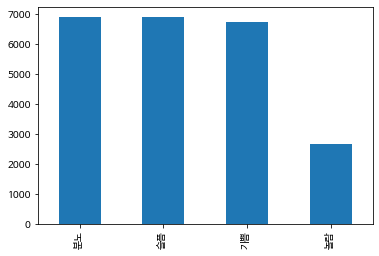

In [ ]:
count_emotion3_clean_test = pd.value_counts(emotion3_clean_test['감정_대분류'].values, sort=True)
count_emotion3_clean_test.plot.bar()

In [ ]:
# emotion4
# 필요하지 않은 감정들은 삭제(불안, 상처, 당황)
index3 = emotion4_clean_test[(emotion4_clean_test['감정_대분류'].str.contains('불안'))|(emotion4_clean_test['감정_대분류'].str.contains('상처'))|(emotion4_clean_test['감정_대분류'].str.contains('당황'))].index
# print(index3)
emotion4_clean_test = emotion4_clean_test.drop(index3)
emotion4_clean_test

,감정_대분류,사람문장1
0,분노,요즘 부모님과 많이 부딪혀.
1,슬픔,엄마가 결국 집을 나갔어. 너무 너무 슬퍼.
4,분노,남편이 이혼할 때 위자료를 주지 않으려고 변호사를 고용했어.
5,놀람,친구들과 노후에 대한 이야기를 하다 보니 서로 노후 자금 차이가 상당히 컸어.
7,분노,요즘 딸에게 뭔가 물어보면 신경질부터 내는데 화가 나.
...,...,...
5124,분노,학교 친구들이 나만 계속 따돌려서 너무 무서워.
5125,기쁨,부동산 임대 소득으로 현재 여유롭게 살 수 있어서 좋단다.
5127,분노,연애하고 싶은데 소개팅만 나가면 꽝이야. 이러다가 난 결혼 못 하고 늙어 죽을 거야.
5128,분노,은행 대출이 막혀서 생활비를 구할 수가 없어. 이제 어떻게 살아야 하나 막막해.


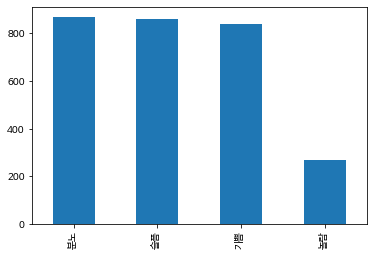

In [ ]:
count_emotion4_clean_test = pd.value_counts(emotion4_clean_test['감정_대분류'].values, sort=True)
count_emotion4_clean_test.plot.bar()

In [ ]:
# emotion3과 emotion4의 컬럼명을 emotion1과 동일하게 변경
emotion3_clean_test.columns = ['Emotion','Sentence']
emotion4_clean_test.columns = ['Emotion','Sentence']

print(emotion3_clean_test.head())
print(emotion4_clean_test.head())

  Emotion                                       Sentence
0      기쁨                      아내가 드디어 출산하게 되어서 정말 신이 나.
2      놀람        고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.
3      기쁨  재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.
4      기쁨                   빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.
6      슬픔                  사십 대에 접어들면서 머리카락이 많이 빠져 고민이야.
  Emotion                                     Sentence
0      분노                              요즘 부모님과 많이 부딪혀.
1      슬픔                     엄마가 결국 집을 나갔어. 너무 너무 슬퍼.
4      분노            남편이 이혼할 때 위자료를 주지 않으려고 변호사를 고용했어.
5      놀람  친구들과 노후에 대한 이야기를 하다 보니 서로 노후 자금 차이가 상당히 컸어.
7      분노               요즘 딸에게 뭔가 물어보면 신경질부터 내는데 화가 나.


In [ ]:
# emotion3과 emotion4의 컬럼을 emotion1과 동일한 컬럼 위치로 수정
emotion3_clean_test = emotion3_clean_test[['Sentence','Emotion']]
emotion4_clean_test = emotion4_clean_test[['Sentence','Emotion']]

print(emotion3_clean_test.head())
emotion4_clean_test.head()

                                        Sentence Emotion
0                      아내가 드디어 출산하게 되어서 정말 신이 나.      기쁨
2        고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.      놀람
3  재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.      기쁨
4                   빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.      기쁨
6                  사십 대에 접어들면서 머리카락이 많이 빠져 고민이야.      슬픔


,Sentence,Emotion
0,요즘 부모님과 많이 부딪혀.,분노
1,엄마가 결국 집을 나갔어. 너무 너무 슬퍼.,슬픔
4,남편이 이혼할 때 위자료를 주지 않으려고 변호사를 고용했어.,분노
5,친구들과 노후에 대한 이야기를 하다 보니 서로 노후 자금 차이가 상당히 컸어.,놀람
7,요즘 딸에게 뭔가 물어보면 신경질부터 내는데 화가 나.,분노


In [ ]:
# '기쁨' 감정 -> emotion1과 동일하게 '행복'으로 변경
emotion3_clean_test.loc[(emotion3_clean_test['Emotion']=='기쁨'),'Emotion']='행복'
emotion4_clean_test.loc[(emotion4_clean_test['Emotion']=='기쁨'),'Emotion']='행복'

print(emotion3_clean_test.head())
emotion4_clean_test.head()

                                        Sentence Emotion
0                      아내가 드디어 출산하게 되어서 정말 신이 나.      행복
2        고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.      놀람
3  재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.      행복
4                   빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.      행복
6                  사십 대에 접어들면서 머리카락이 많이 빠져 고민이야.      슬픔


,Sentence,Emotion
0,요즘 부모님과 많이 부딪혀.,분노
1,엄마가 결국 집을 나갔어. 너무 너무 슬퍼.,슬픔
4,남편이 이혼할 때 위자료를 주지 않으려고 변호사를 고용했어.,분노
5,친구들과 노후에 대한 이야기를 하다 보니 서로 노후 자금 차이가 상당히 컸어.,놀람
7,요즘 딸에게 뭔가 물어보면 신경질부터 내는데 화가 나.,분노


In [ ]:
# emotion1_clean 확인
emotion1_clean.info()
emotion1_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27697 entries, 5468 to 33164
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  27697 non-null  object
 1   Emotion   27697 non-null  object
dtypes: object(2)
memory usage: 649.1+ KB


,Sentence,Emotion
5468,7로 나온다든데 아니었나,놀람
5469,의사양반 내가고자라니!,놀람
5470,이 사람 얼굴이 약간 전라도 사람처럼 생겼네,놀람
5471,아직도 안잡았냐??,놀람
5472,이분 ~~진짜 욕먹는건 이제 신의 영역에 들어선거같다~~ㅋㅋ,놀람


In [ ]:
# emotion1과 emotion3, emotion4 합치고 인덱스 새로 지정
emotion_clean_mid = pd.concat([emotion1_clean,emotion3_clean_test,emotion4_clean_test], ignore_index=True)
emotion_clean_mid

,Sentence,Emotion
0,7로 나온다든데 아니었나,놀람
1,의사양반 내가고자라니!,놀람
2,이 사람 얼굴이 약간 전라도 사람처럼 생겼네,놀람
3,아직도 안잡았냐??,놀람
4,이분 ~~진짜 욕먹는건 이제 신의 영역에 들어선거같다~~ㅋㅋ,놀람
...,...,...
53737,학교 친구들이 나만 계속 따돌려서 너무 무서워.,분노
53738,부동산 임대 소득으로 현재 여유롭게 살 수 있어서 좋단다.,행복
53739,연애하고 싶은데 소개팅만 나가면 꽝이야. 이러다가 난 결혼 못 하고 늙어 죽을 거야.,분노
53740,은행 대출이 막혀서 생활비를 구할 수가 없어. 이제 어떻게 살아야 하나 막막해.,분노


In [ ]:
print('<emotion_clean_mid>')
print('분노: ' + str(len(emotion_clean_mid[emotion_clean_mid['Emotion']=='분노'])))
print('슬픔: ' + str(len(emotion_clean_mid[emotion_clean_mid['Emotion']=='슬픔'])))
print('놀람: ' + str(len(emotion_clean_mid[emotion_clean_mid['Emotion']=='놀람'])))
print('중립: ' + str(len(emotion_clean_mid[emotion_clean_mid['Emotion']=='중립'])))
print('행복: ' + str(len(emotion_clean_mid[emotion_clean_mid['Emotion']=='행복'])))

<emotion_clean_mid>
분노: 13442
슬픔: 13024
놀람: 8839
중립: 4830
행복: 13607


## emotion2에서 '놀람', '중립' 데이터 가져오기

In [ ]:
emotion2_clean

,Sentence,Emotion
1,아 진짜! 사무실에서 피지 말라니깐! 간접흡연이 얼마나 안좋은데!,분노
2,그럼 직접흡연하는 난 얼마나 안좋겠니? 안그래? 보면 꼭... 지 생각만 하고.,혐오
3,손님 왔어요.,중립
4,손님? 누구?,중립
5,몰라요. 팀장님 친구래요.,중립
...,...,...
55624,얘긴 다 끝났냐? 원예부,중립
55625,"예. 그거 때문에, 부탁이 있......는......데요.",중립
55626,여자 숨겨달라는거면 사절이다.,중립
55627,아무래도 안되나요?,중립


In [ ]:
# emotion2에서 'Emotion'이 '놀람'인 문장 확인
emotion2_clean[emotion2_clean['Emotion']=='놀람']

,Sentence,Emotion
17,나? ... 나보고 하라고?,놀람
19,근데 왜... 나한테...?,놀람
49,... 오.,놀람
60,... 대리석?,놀람
106,요기잖아. 요기. 강 건너 윗동네도 몰라?,놀람
...,...,...
55466,...그거 괜찮긴 한 거야?,놀람
55525,……이 인형은 뭐야?,놀람
55587,어? 정말요?,놀람
55589,"혹시, 다들 은행 계좌없는 거예요?",놀람


In [ ]:
# emotion2에서 'Emotion'이 '놀람'인 문장 emotion2_surprise에 저장
emotion2_surprise = emotion2_clean[emotion2_clean['Emotion']=='놀람']

In [ ]:
# emotion2에서 'Emotion'이 '중립'인 문장 확인
emotion2_clean[emotion2_clean['Emotion']=='중립']

,Sentence,Emotion
3,손님 왔어요.,중립
4,손님? 누구?,중립
5,몰라요. 팀장님 친구래요.,중립
6,내 친구? 친구 누구?,중립
8,그래서... 무슨 일 해?,중립
...,...,...
55624,얘긴 다 끝났냐? 원예부,중립
55625,"예. 그거 때문에, 부탁이 있......는......데요.",중립
55626,여자 숨겨달라는거면 사절이다.,중립
55627,아무래도 안되나요?,중립


In [ ]:
# Emotion이 '중립'인 데이터 중 일정 길이 이상의 문장만 파싱

# '중립' 문장들의 길이를 세서 neutral_len이라는 칼럼으로 저장
emotion2_neutral = emotion2_clean[emotion2_clean['Emotion']=='중립']
emotion2_neutral
emotion2_neutral['neutral_len'] = emotion2_neutral['Sentence'].apply(lambda x: len(x))
emotion2_neutral

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Sentence,Emotion,neutral_len
3,손님 왔어요.,중립,7
4,손님? 누구?,중립,7
5,몰라요. 팀장님 친구래요.,중립,14
6,내 친구? 친구 누구?,중립,12
8,그래서... 무슨 일 해?,중립,14
...,...,...,...
55624,얘긴 다 끝났냐? 원예부,중립,13
55625,"예. 그거 때문에, 부탁이 있......는......데요.",중립,32
55626,여자 숨겨달라는거면 사절이다.,중립,16
55627,아무래도 안되나요?,중립,10


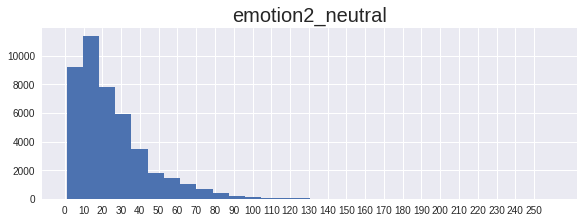

In [ ]:
# emotion2의 중립 문장길이 분포 확인
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

emotion2_neutral_len = [len(x) for x in emotion2_neutral['Sentence']]

plt.subplots(constrained_layout=True)

plt.subplot(2, 1, 1)
plt.title('emotion2_neutral', fontsize=20)
plt.hist(emotion2_neutral_len, bins=30)
plt.xticks(np.arange(0, 260, 10))

plt.show()

In [ ]:
emotion2_neutral_len = [len(x) for x in emotion2_neutral['Sentence']]

sum=0
for x in emotion2_neutral_len:
  if 40<= x <= 50:
    sum=sum+1
print(sum)

3095


In [ ]:
emotion2_neutral_len = [len(x) for x in emotion2_neutral['Sentence']]

sum=0
for x in emotion2_neutral_len:
  if 30<= x<=50:
    sum=sum+1
print(sum)
print(np.mean(emotion2_neutral_len))
print(max(emotion2_neutral_len))

8609
24.926688895994154
260


In [ ]:
# 30~50 길이의 문장만 emotion2_neutral_parse에 저장
emotion2_neutral_parse = emotion2_neutral[(30 <= emotion2_neutral['neutral_len']) & (emotion2_neutral['neutral_len'] <= 50)]
emotion2_neutral_parse

,Sentence,Emotion,neutral_len
11,케이블 같은데서 아침에 배도 타고 산도 오르고. 있어 그런 거.,중립,35
25,"야야. 그러지말고, 내가 이런 거 잘하는데 딴데 소개 시켜줄께. 이런 거...",중립,43
26,이런 거? 돈이 안된다 이거야? 돈 제대로 줄께. 걱정마.,중립,32
48,의사. 돈 잘 버는 압구정동 성형외과. 비포에프터 전문.,중립,31
50,그러다가 음... 그게 끝이네? 와. 나 너무 심플하게 살았나?,중립,37
...,...,...,...
55600,그러니까 그게 회사 돈이라면 조폭과는 관계없는 거잖아요,중립,30
55606,"흐음, 월급은 전원에게 직접 준다라. 확실히 그렇게 말했단 말이지?",중립,37
55608,그렇군. 그렇다면 우리가 세웠던 가설이 조금 더 확신을 얻게 되는군.,중립,38
55609,조사결과에 따르면 의뢰인의 아버지는 횡령같은 걸 하지 않았다고 하는군.,중립,39


In [ ]:
# emotion2_neutral_parse에서 neutral_len 칼럼 삭제
emotion2_neutral_parse = emotion2_neutral_parse.drop(columns='neutral_len')

In [ ]:
emotion2_neutral_parse

,Sentence,Emotion
11,케이블 같은데서 아침에 배도 타고 산도 오르고. 있어 그런 거.,중립
25,"야야. 그러지말고, 내가 이런 거 잘하는데 딴데 소개 시켜줄께. 이런 거...",중립
26,이런 거? 돈이 안된다 이거야? 돈 제대로 줄께. 걱정마.,중립
48,의사. 돈 잘 버는 압구정동 성형외과. 비포에프터 전문.,중립
50,그러다가 음... 그게 끝이네? 와. 나 너무 심플하게 살았나?,중립
...,...,...
55600,그러니까 그게 회사 돈이라면 조폭과는 관계없는 거잖아요,중립
55606,"흐음, 월급은 전원에게 직접 준다라. 확실히 그렇게 말했단 말이지?",중립
55608,그렇군. 그렇다면 우리가 세웠던 가설이 조금 더 확신을 얻게 되는군.,중립
55609,조사결과에 따르면 의뢰인의 아버지는 횡령같은 걸 하지 않았다고 하는군.,중립


In [ ]:
# emotion_clean_mid, emotion2_neutral_parse, emotion2_surprise 합치고 인덱스 새로 지정
emotion_clean = pd.concat([emotion_clean_mid, emotion2_neutral_parse, emotion2_surprise], ignore_index=True)
emotion_clean

,Sentence,Emotion
0,7로 나온다든데 아니었나,놀람
1,의사양반 내가고자라니!,놀람
2,이 사람 얼굴이 약간 전라도 사람처럼 생겼네,놀람
3,아직도 안잡았냐??,놀람
4,이분 ~~진짜 욕먹는건 이제 신의 영역에 들어선거같다~~ㅋㅋ,놀람
...,...,...
67212,...그거 괜찮긴 한 거야?,놀람
67213,……이 인형은 뭐야?,놀람
67214,어? 정말요?,놀람
67215,"혹시, 다들 은행 계좌없는 거예요?",놀람


In [ ]:
print('<emotion_clean>')
print('분노: ' + str(len(emotion_clean[emotion_clean['Emotion']=='분노'])))
print('슬픔: ' + str(len(emotion_clean[emotion_clean['Emotion']=='슬픔'])))
print('놀람: ' + str(len(emotion_clean[emotion_clean['Emotion']=='놀람'])))
print('중립: ' + str(len(emotion_clean[emotion_clean['Emotion']=='중립'])))
print('행복: ' + str(len(emotion_clean[emotion_clean['Emotion']=='행복'])))

<emotion_clean>
분노: 13442
슬픔: 13024
놀람: 13705
중립: 13439
행복: 13607


In [ ]:
# emotion_clean의 문장길이 평균과 최댓값 추력
emotion_clean_len = [len(x) for x in emotion_clean['Sentence']]

print(np.mean(emotion_clean_len))
print(max(emotion_clean_len))

28.883437225701833
299


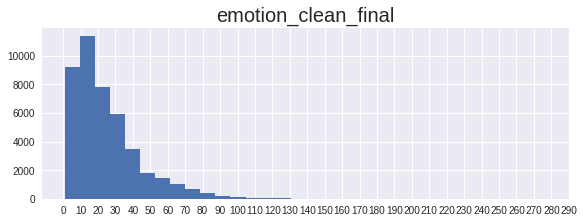

In [ ]:
# 최종 중립 데이터의 문장길이 분포 확인
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

emotion2_neutral_len = [len(x) for x in emotion2_neutral['Sentence']]

plt.subplots(constrained_layout=True)

plt.subplot(2, 1, 1)
plt.title('중립 데이터_final', fontsize=20)
plt.hist(emotion2_neutral_len, bins=30)
plt.xticks(np.arange(0, 300, 10))

plt.show()

In [ ]:
# 결측값 정보 출력
emotion_clean.isnull().sum()

Sentence    0
Emotion     0
dtype: int64

# 데이터 저장
- 맞춤법 검사X 데이터

In [ ]:
# 5emotions_data.csv란 이름으로 emotion_clean 데이터 저장
import os

f_path = 'drive/MyDrive/new_mood/'
f_name = "5emotions_data.csv"

# 인덱스 출력X
emotion_clean.to_csv(os.path.join(f_path, f_name), index=False)

In [ ]:
# 저장한 데이터 불러오기
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

emotion_test_data = pd.read_csv('/content/drive/MyDrive/new_mood/5emotions_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
emotion_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67217 entries, 0 to 67216
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  67217 non-null  object
 1   Emotion   67217 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


In [ ]:
print('<emotion_test_data>')
print('분노: ' + str(len(emotion_test_data[emotion_test_data['Emotion']=='분노'])))
print('슬픔: ' + str(len(emotion_test_data[emotion_test_data['Emotion']=='슬픔'])))
print('놀람: ' + str(len(emotion_test_data[emotion_test_data['Emotion']=='놀람'])))
print('중립: ' + str(len(emotion_test_data[emotion_test_data['Emotion']=='중립'])))
print('행복: ' + str(len(emotion_test_data[emotion_test_data['Emotion']=='행복'])))

<emotion_test_data>
분노: 13442
슬픔: 13024
놀람: 13705
중립: 13439
행복: 13607


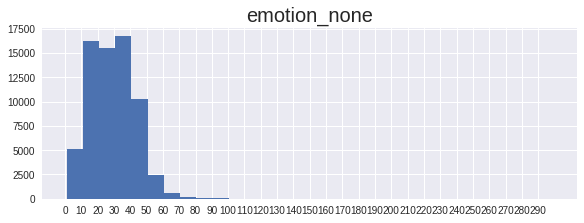

In [ ]:
# 최종 emotion_none의 문장길이 분포 확인
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

emotion_none_len = [len(x) for x in emotion_test_data['Sentence']]

plt.subplots(constrained_layout=True)

plt.subplot(2, 1, 1)
plt.title('emotion_none', fontsize=20)
plt.hist(emotion_none_len, bins=30)
plt.xticks(np.arange(0, 300, 10))

plt.show()

In [ ]:
import pandas as pd

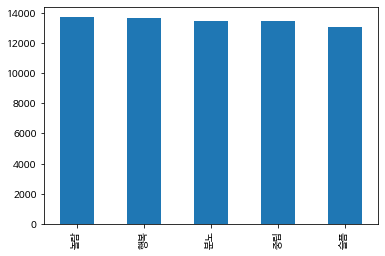

In [ ]:
count_emotion_test_data = pd.value_counts(emotion_test_data['Emotion'].values, sort=True)
count_emotion_test_data.plot.bar()

In [ ]:
import numpy as np

# emotion_clean의 문장길이 평균과 최댓값 출력
emotion_cleaned_len = [len(x) for x in emotion_test_data['Sentence']]

print(np.mean(emotion_cleaned_len))
print(max(emotion_cleaned_len))

28.883437225701833
299


# 데이터 전처리
- 한글만 남기기
- 맞춤법, 띄어쓰기 교정
- 반복문자 정제

In [ ]:
# 맞춤법, 띄어쓰기 교정
!pip install git+https://github.com/ssut/py-hanspell.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-83221yjx
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-83221yjx
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4868 sha256=9efe7177e0c3cf3d627565612fc12643afeadbc733cd4c1fdd54924a795316a2
  Stored in directory: /tmp/pip-ephem-wheel-cache-uyfw0rx_/wheels/ab/f5/7b/d4124bb329c905301baed80e2ae45aa14e824f62ebc3ec2cc4
Successfully built py-hanspell


In [ ]:
# 반복 문자 정규화
!pip install soynlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 416 kB 7.9 MB/s 


In [ ]:
import re
from hanspell import spell_checker
from soynlp.normalizer import *

In [ ]:
cleaning_emotion = pd.read_csv('/content/drive/MyDrive/new_mood/5emotions_data.csv')

In [ ]:
def cleaning(line):
  # 한글만 남기고 나머지는 삭제(한글과 띄어쓰기를 제외한 모든 부분을 제거)
    parseText = re.compile('[^ \u3131-\u3163\uac00-\ud7a3]+').sub('', line)

    spelled_sent = spell_checker.check(parseText)
    checkedText = spelled_sent.checked # 맞춤법 교정 후 문장 저장(띄어쓰기까지 교정함)

    refinedText = repeat_normalize(checkedText, num_repeats=2) # 반복 문자 정제(ex) ㅋㅋㅋㅋㅋ, ㅎㅎㅎ)
    return refinedText

In [ ]:
cleaning_emotion['Sentence'] = cleaning_emotion['Sentence'].apply(cleaning)

ConnectionError: ignored

In [ ]:
# 5emotions_data_cleaned.csv란 이름으로 cleaning_emotion 데이터 저장
import os

f_path = 'drive/MyDrive/new_mood/'
f_name = "5emotions_cleaned.csv"

# 인덱스 출력X
cleaning_emotion.to_csv(os.path.join(f_path, f_name), index=False)

# 처리 데이터 확인
- 결측값 제거

In [ ]:
# 저장한 데이터 불러오기
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

emotion_cleaned_data = pd.read_csv('/content/drive/MyDrive/new_mood/5emotions_cleaned.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
emotion_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67217 entries, 0 to 67216
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  67214 non-null  object
 1   Emotion   67217 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


In [ ]:
# 결측값 정보 출력
emotion_cleaned_data.isnull().sum()

Sentence    3
Emotion     0
dtype: int64

In [ ]:
# 결측값 삭제
emotion_cleaned_data.dropna(inplace=True)

In [ ]:
# 결측값 정보 출력
emotion_cleaned_data.isnull().sum()

Sentence    0
Emotion     0
dtype: int64

In [ ]:
emotion_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67214 entries, 0 to 67216
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  67214 non-null  object
 1   Emotion   67214 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [ ]:
print('<emotion_cleaned_data>')
print('분노: ' + str(len(emotion_cleaned_data[emotion_cleaned_data['Emotion']=='분노'])))
print('슬픔: ' + str(len(emotion_cleaned_data[emotion_cleaned_data['Emotion']=='슬픔'])))
print('놀람: ' + str(len(emotion_cleaned_data[emotion_cleaned_data['Emotion']=='놀람'])))
print('중립: ' + str(len(emotion_cleaned_data[emotion_cleaned_data['Emotion']=='중립'])))
print('행복: ' + str(len(emotion_cleaned_data[emotion_cleaned_data['Emotion']=='행복'])))

<emotion_cleaned_data>
분노: 13442
슬픔: 13024
놀람: 13703
중립: 13439
행복: 13606


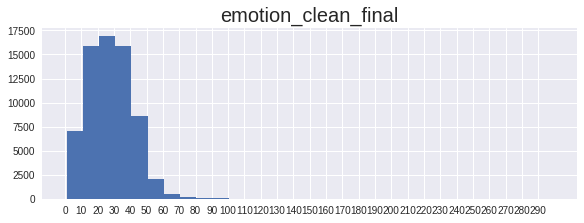

In [ ]:
# 최종 emotion_clean의 문장길이 분포 확인
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

emotion_cleaned_len = [len(x) for x in emotion_cleaned_data['Sentence']]

plt.subplots(constrained_layout=True)

plt.subplot(2, 1, 1)
plt.title('emotion_clean_final', fontsize=20)
plt.hist(emotion_cleaned_len, bins=30)
plt.xticks(np.arange(0, 300, 10))

plt.show()

In [ ]:
# emotion_clean의 문장길이 평균과 최댓값 출력
emotion_cleaned_len = [len(x) for x in emotion_cleaned_data['Sentence']]

print(np.mean(emotion_cleaned_len))
print(max(emotion_cleaned_len))

27.442244175320617
299


In [ ]:
# index reset하기 - 기존 index 제거 X
emotion_cleaned_data.reset_index(drop=False)

,index,Sentence,Emotion
0,0,로 나온다던데 아니었나,놀람
1,1,의사 양반 내가 고자라니,놀람
2,2,이 사람 얼굴이 약간 전라도 사람처럼 생겼네,놀람
3,3,아직도 안 잡았냐,놀람
4,4,이분 진짜 욕먹는 건 이제 신의 영역에 들어선거같다ㅋㅋ,놀람
...,...,...,...
67209,67212,그거 괜찮긴 한 거야,놀람
67210,67213,이 인형은 뭐야,놀람
67211,67214,어 정말요,놀람
67212,67215,혹시 다들 은행 계좌 없는 거예요,놀람


In [ ]:
# index reset하기 - 기존 index 제거 O
emotion_cleaned_data.reset_index(drop=True)

,Sentence,Emotion
0,로 나온다던데 아니었나,놀람
1,의사 양반 내가 고자라니,놀람
2,이 사람 얼굴이 약간 전라도 사람처럼 생겼네,놀람
3,아직도 안 잡았냐,놀람
4,이분 진짜 욕먹는 건 이제 신의 영역에 들어선거같다ㅋㅋ,놀람
...,...,...
67209,그거 괜찮긴 한 거야,놀람
67210,이 인형은 뭐야,놀람
67211,어 정말요,놀람
67212,혹시 다들 은행 계좌 없는 거예요,놀람


In [ ]:
# 5emotions_cleaned_final.csv란 이름으로 emotion_cleaned_data 저장
import os

f_path = 'drive/MyDrive/new_mood/'
f_name = "5emotions_cleaned_final.csv"

# 인덱스 출력X
emotion_cleaned_data.to_csv(os.path.join(f_path, f_name), index=False)

In [ ]:
# 저장한 데이터 불러오기
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

emotion_cleaned_final = pd.read_csv('/content/drive/MyDrive/new_mood/5emotions_cleaned_final.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
emotion_cleaned_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67214 entries, 0 to 67213
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  67214 non-null  object
 1   Emotion   67214 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


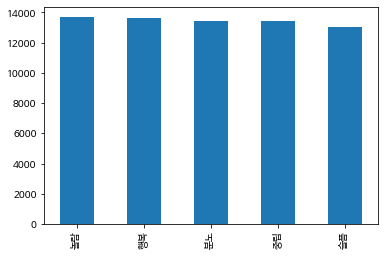

In [ ]:
count_emotion_cleaned_final = pd.value_counts(emotion_cleaned_final['Emotion'].values, sort=True)
count_emotion_cleaned_final.plot.bar()

# 데이터 섞기

In [ ]:
emotion_shuffle_test = [[sentence, emotion] for sentence, emotion in zip(emotion_cleaned_final['Sentence'],emotion_cleaned_final['Emotion'])]
emotion_shuffle_test

[['로 나온다던데 아니었나', '놀람'],
 ['의사 양반 내가 고자라니', '놀람'],
 ['이 사람 얼굴이 약간 전라도 사람처럼 생겼네', '놀람'],
 ['아직도 안 잡았냐', '놀람'],
 ['이분 진짜 욕먹는 건 이제 신의 영역에 들어선거같다ㅋㅋ', '놀람'],
 ['똥구멍 그냥 확', '놀람'],
 ['진짜 종횡무진하잖아', '놀람'],
 ['미군 주둔하면 식민지라며 ㅎㄷ', '놀람'],
 ['와 한강 이 사람도 전라도 출신이네', '놀람'],
 ['아니 삼성처럼 기업을 운영한 것도 아닌데 어떻게 개인 일가가 천억이란', '놀람'],
 ['한국에서 저런 일이', '놀람'],
 ['나라 자체가 도로가 기준일 만큼 반듯반듯하게 지어놨냐', '놀람'],
 ['대박 진짜 탈퇴할 줄이야', '놀람'],
 ['비 많이 와', '놀람'],
 ['지금 주문해도 월에 못 받는다던데', '놀람'],
 ['내 발등 뼈는 왜 조각났늬', '놀람'],
 ['시스코 피지컬 조짐 ㅋㅋ', '놀람'],
 ['근데 요즘 추격전은 유재석만 뛰어다녀', '놀람'],
 ['난 또 욕하고 뭐 시비 턴 줄 ㅋㅋ', '놀람'],
 ['아니 근데 여기서 왜 신부가 불쌍하다고 함', '놀람'],
 ['대단하다', '놀람'],
 ['저게 아르바이트하는 건가', '놀람'],
 ['근데 웃긴 건 한파는 정확히 맞추더라', '놀람'],
 ['우와 중국 깡은 대단하다', '놀람'],
 ['이 새끼 가수였어', '놀람'],
 ['정말 이게 기사야', '놀람'],
 ['내 재산보다 작네', '놀람'],
 ['의료 내 몸을 기계에 맡기라고', '놀람'],
 ['세시대', '놀람'],
 ['주식이 하루에 한 주당 십만 원이 떨어지네', '놀람'],
 ['퀄컴이 우리나라 법을 어째 다 아냐', '놀람'],
 ['나라의 역사를 바꾸어 놓으셨네요', '놀람'],
 ['대형 지진 일어나는 거 아님', '놀람'],
 ['그동안 갓틸리케 아니었냐고', '놀람'],
 ['검찰이 그네 수사한다고', '놀람'],
 ['그러

In [ ]:
import random
random.shuffle(emotion_shuffle_test)
emotion_shuffle_test

[['박효신이 이렇게 대단했었나', '놀람'],
 ['자연을 파괴하는 건 언제나 인간들', '분노'],
 ['바로 박우담 진짜 깜짝 놀랐다', '놀람'],
 ['너 이름은 이제 이완용이다', '분노'],
 ['세계인 이게 북한이야 남한이야 ㅋㅋㅋ', '놀람'],
 ['그 과거가 뭔지 모르니 문제 아니겠습니까 상황을 설명해주시던가요', '중립'],
 ['나 완전히 새', '놀람'],
 ['근혜야 네가 무슨 짓을 했냐 일본에 뭔 약점을 잡힌 것은 아니제', '놀람'],
 ['그게 좋겠네요 구체적으로 어떤 프로그램이 있는지 알아봐야겠어요 위치도 알아보고요', '중립'],
 ['어 어어 회사에 새로 나왔길래 개월 무이자 할부야 괜찮아', '중립'],
 ['뭐 아침 운동 왜', '놀람'],
 ['불량률 그건 불량률이 아니라 폭발 보고된 건수일 뿐이지', '중립'],
 ['점장 때문에 화가 나', '분노'],
 ['갖은 노력을 했는데 아내의 기억은 돌아오지 않아 너무 슬퍼', '슬픔'],
 ['어 정말 둘도 없이 친했던 사이거든 그런데도 이런다', '중립'],
 ['나이가 들어 죽음의 문 앞에 선다면 편안하게 자면서 천국에 가고 싶어', '행복'],
 ['청담고 이대 섞을 대로 섞은 학교', '중립'],
 ['자국민도 등쳐먹는데 외인은 볼 필요도 없지 시발택시', '중립'],
 ['경로당에 새로 온 할머니가 성질이 더러워서 화가 나', '분노'],
 ['완전 너의 목소리가 들려네', '중립'],
 ['오늘부터 국민연금이 나온대', '행복'],
 ['금방 사라지고 마는 스타들이 많은 우리 프로야구계에서 아저씨야말로 지존입니다', '행복'],
 ['이렇게 먼 데서 다녔어', '놀람'],
 ['기삿거리 없어', '놀람'],
 ['예', '놀람'],
 ['진짜 서있을 때는 좀 당기긴 하지만 괜찮은데 누울 때나 고개를 뒤로 젖힐 때 아파요', '슬픔'],
 ['꼭 연애 처음 하는 애들이 남자랑 이런 거 나눠달고 유별을 떨지 촌스럽게', '중립'],
 ['막 영 정말 리스펙트 해요

In [ ]:
emotion_cleaned_final['Sentence'] = [n[0] for n in emotion_shuffle_test]
emotion_cleaned_final['Emotion'] = [n[1] for n in emotion_shuffle_test]
emotion_cleaned_final

,Sentence,Emotion
0,박효신이 이렇게 대단했었나,놀람
1,자연을 파괴하는 건 언제나 인간들,분노
2,바로 박우담 진짜 깜짝 놀랐다,놀람
3,너 이름은 이제 이완용이다,분노
4,세계인 이게 북한이야 남한이야 ㅋㅋㅋ,놀람
...,...,...
67209,강호동 배신 소름,놀람
67210,보면서 나만 슬픈 건가,슬픔
67211,열사 한 명 나와야 한다,중립
67212,오늘 생일인데 친구들이 깜짝파티를 열어주었지 뭐야,행복


In [ ]:
# 5emotions_cleaned_shuffle.csv란 이름으로 emotion_cleaned_data 저장
import os

f_path = 'drive/MyDrive/new_mood/'
f_name = "5emotions_cleaned_shuffle.csv"

# 인덱스 출력X
emotion_cleaned_final.to_csv(os.path.join(f_path, f_name), index=False)

In [ ]:
# 저장한 데이터 불러오기
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

emotion_clean_shuffle = pd.read_csv('/content/drive/MyDrive/new_mood/5emotions_cleaned_shuffle.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
emotion_clean_shuffle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67214 entries, 0 to 67213
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  67214 non-null  object
 1   Emotion   67214 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


# 전처리 안 한 데이터 섞기

In [ ]:
# 저장한 데이터 불러오기
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

emotion_shuffle = pd.read_csv('/content/drive/MyDrive/new_mood/5emotions_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
emotion_shuffle2 = [[sentence, emotion] for sentence, emotion in zip(emotion_shuffle['Sentence'],emotion_shuffle['Emotion'])]
emotion_shuffle2

[[' 7로 나온다든데 아니었나', '놀람'],
 ['의사양반 내가고자라니!', '놀람'],
 ['이 사람 얼굴이 약간 전라도 사람처럼 생겼네', '놀람'],
 ['아직도 안잡았냐??', '놀람'],
 ['이분 ~~진짜 욕먹는건 이제 신의 영역에 들어선거같다~~ㅋㅋ', '놀람'],
 [' 똥꼬 그냥 확.', '놀람'],
 [' 진짜 종횡무진하잖아', '놀람'],
 [' 미군 주둔하면 식민지라며? ㅎㄷ', '놀람'],
 ['와 한강 이사람도 전라도출신이네', '놀람'],
 ['아니 삼성처럼 기업을 운영한.것도 아닌데 어떻게 개인 일가가 8천억이란.', '놀람'],
 [' 한국에서 저런일이~!!', '놀람'],
 ['나라 자체가 도로가 기준일 만큼 반듯반듯하게 지어놨냐.', '놀람'],
 ['대박..진짜 탈퇴할 줄 이야..', '놀람'],
 [' 비 많이 와', '놀람'],
 ['지금 주문해도 9월에 못받는다던데?', '놀람'],
 [' 내 발등뼈는 왜 조각났늬', '놀람'],
 ['시스코 피지컬 조짐 ㅋㅋㅋㅋㅋ', '놀람'],
 [' 근데 요즘 추격전은 유재석만 뛰어다녀. .', '놀람'],
 [' 난또 욕하고 뭐시비턴줄 ㅋㅋ', '놀람'],
 ['아니 근데 여기서 왜 신부가 불쌍하다고 함?', '놀람'],
 ['대단하다.', '놀람'],
 ['저게 알바하는건가...?', '놀람'],
 ['근데 웃긴건 한파는 정확히맞추더라...', '놀람'],
 ['우와..중국 .깡은 대단하다...', '놀람'],
 ['이시키 가수였어?', '놀람'],
 [' 정말 이게 기사야???', '놀람'],
 ['내 재산보다 작네...', '놀람'],
 [' 의료 내 몸을 기계에 맡기라고?', '놀람'],
 ['100세시대?', '놀람'],
 ['주식이 하루에 한주당 십만원이 떨어지네 ee', '놀람'],
 ['퀄컴이 우리나라법을 우째 다아냐?', '놀람'],
 [' 나라의 역사를 바꾸어 놓으셨네요.', '놀람'],
 ['대형지진 일어나는거 아님?', '놀람'],
 [' 그동안 갓틸리케

In [ ]:
import random
random.shuffle(emotion_shuffle2)
emotion_shuffle2

[['감성팔이 보다는 자국의 이익이 우선이라는 트럼프를 보니 어쩐지 대단하다는 생각도 든다.', '슬픔'],
 ['멋져요~~ 영화 꼭 볼게요', '행복'],
 ['백현 무대에서 눈빛 표정 진짜 장난아님ㅠㅠ 목소리도 개좋고ㅜㅠㅜ 기대중', '행복'],
 ['아니 왠 호수에 악어가? ㅠㅠ', '놀람'],
 ['매일 지속되는 따돌림에 환멸을 느껴.', '분노'],
 ['난 백억년 뒤를 연구중이니 내게도 세금 좀 줘', '중립'],
 [' 이렇게 부르셔서 고민이예요ㅠㅠ', '슬픔'],
 ['길어서 안 읽고 댓글보러 휙 넘긴 사람', '중립'],
 ['은퇴하면 어떤 삶을 살 게 될까?', '행복'],
 ['영화도 있어?', '놀람'],
 ['걍 안먹거나 채소만 먹어야 살 빠지는거임?0', '슬픔'],
 ['뭐하는 거예요?', '놀람'],
 ['3사단으로 갔는데 검색해보니 백골부대더라구요~', '놀람'],
 ['회사 생활이 너무 힘들어. 정말 출근하기 싫다. 인간관계가 이렇게 힘들 줄 몰랐어.', '슬픔'],
 ['성적이 생각한 것만큼 나오지 않아 걱정이야.', '슬픔'],
 ['선배가 선배다워야 선배 취급을 하지, 무슨 이런 게 선배라고 ', '중립'],
 ['같이 농사일을 하는 친구가 다쳐서 못 나오지만 마을 이장이 대신 도와주기로 했어.', '행복'],
 ['18아 맞으면 가만잇지 말고 공격을 해라', '분노'],
 ['치, 얘가 뭘 모르네. 걔, 흐물흐물 해서 싫다구 죽 안먹어. 내가 것두 모를까봐?', '중립'],
 ['영화관에서한번보고끝내기아까운영회', '행복'],
 ['중고 가게에서 가구를 사 가기도 한다면서? 침대를 팔까 하는데 어떻게 하면 돼?', '중립'],
 ['내가 제일 좋아하는 연예인이 친구의 사촌이래. 정말 깜짝 놀랐어!', '행복'],
 ['제발 다시한번 생각해주세요 yg', '중립'],
 ['이제 곧 내 생일인데 자식 중 누구도 얘기를 꺼내지 않아서 화가 나.', '분노'],
 ['초복이지만 더위는 없다며;;;;;;ㅋㅋㅋㅋㅋㅋㅋㅋ', '중립'

In [ ]:
emotion_shuffle['Sentence'] = [n[0] for n in emotion_shuffle2]
emotion_shuffle['Emotion'] = [n[1] for n in emotion_shuffle2]
emotion_shuffle

,Sentence,Emotion
0,감성팔이 보다는 자국의 이익이 우선이라는 트럼프를 보니 어쩐지 대단하다는 생각도 든다.,슬픔
1,멋져요~~ 영화 꼭 볼게요,행복
2,백현 무대에서 눈빛 표정 진짜 장난아님ㅠㅠ 목소리도 개좋고ㅜㅠㅜ 기대중,행복
3,아니 왠 호수에 악어가? ㅠㅠ,놀람
4,매일 지속되는 따돌림에 환멸을 느껴.,분노
...,...,...
67212,우리 아빠가 술을 마시면 엄마를 때리고 나한테는 술을 따르라고 해. 무섭고 너무 싫어.,분노
67213,내가 정말 발표 준비를 열심히 했는데 우리 조가 꼴찌를 했어.,분노
67214,난 아직도 힘든데 참 대단해....,슬픔
67215,군인이라 누군가의 명령에 복종하는듯...,슬픔


In [ ]:
# 5emotions_shuffle.csv란 이름으로 emotion_shuffle 저장
import os

f_path = 'drive/MyDrive/new_mood/'
f_name = "5emotions_shuffle.csv"

# 인덱스 출력X
emotion_shuffle.to_csv(os.path.join(f_path, f_name), index=False)

In [ ]:
# 저장한 데이터 불러오기
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

emotion_shuffle_final = pd.read_csv('/content/drive/MyDrive/new_mood/5emotions_shuffle.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
emotion_shuffle_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67217 entries, 0 to 67216
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  67217 non-null  object
 1   Emotion   67217 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


In [ ]:
emotion_shuffle_final[emotion_shuffle_final['Emotion']=='행복']

,Sentence,Emotion
1,멋져요~~ 영화 꼭 볼게요,행복
2,백현 무대에서 눈빛 표정 진짜 장난아님ㅠㅠ 목소리도 개좋고ㅜㅠㅜ 기대중,행복
8,은퇴하면 어떤 삶을 살 게 될까?,행복
16,같이 농사일을 하는 친구가 다쳐서 못 나오지만 마을 이장이 대신 도와주기로 했어.,행복
19,영화관에서한번보고끝내기아까운영회,행복
...,...,...
67188,나는 엄마가 바라는 대로 대학에 꼭 합격할 거야.,행복
67196,오늘 내 생일 축하 파티해줘서 너무 기뻤어.,행복
67200,내가 건강은 자신하지 못하지만 경제 걱정은 없어서 참 다행이야.,행복
67208,로또에 당첨됐어. 되게 행복해.,행복


# 중복 데이터 제거

In [ ]:
# 일부 수정 중인 데이터 불러오기
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

emotion_none_set = pd.read_csv('/content/drive/MyDrive/new_mood/5emotion_none_data_ing.csv')

Mounted at /content/drive


In [ ]:
emotion_none_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66503 entries, 0 to 66502
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  66503 non-null  object
 1   Emotion   66503 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


In [ ]:
import numpy as np

# emotion_none_set의 문장길이 평균과 최댓값 출력
emotion_none_set_len = [len(x) for x in emotion_none_set['Sentence']]

print(np.mean(emotion_none_set_len))
print(max(emotion_none_set_len))

29.055877178473153
299


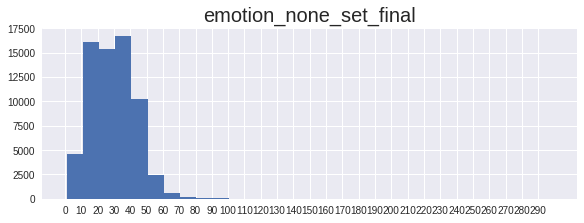

In [ ]:
# emotion_none_set의 문장길이 분포 확인
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

emotion_none_set_len = [len(x) for x in emotion_none_set['Sentence']]

plt.subplots(constrained_layout=True)

plt.subplot(2, 1, 1)
plt.title('emotion_none_set_final', fontsize=20)
plt.hist(emotion_none_set_len, bins=30)
plt.xticks(np.arange(0, 300, 10))

plt.show()

In [ ]:
print('<emotion_none_set>')
print('분노: ' + str(len(emotion_none_set[emotion_none_set['Emotion']=='분노'])))
print('슬픔: ' + str(len(emotion_none_set[emotion_none_set['Emotion']=='슬픔'])))
print('놀람: ' + str(len(emotion_none_set[emotion_none_set['Emotion']=='놀람'])))
print('중립: ' + str(len(emotion_none_set[emotion_none_set['Emotion']=='중립'])))
print('행복: ' + str(len(emotion_none_set[emotion_none_set['Emotion']=='행복'])))

<emotion_none_set>
분노: 13443
슬픔: 13022
놀람: 12992
중립: 13439
행복: 13607


In [ ]:
import pandas as pd

# 중복된 문장들 제거
emotion_set = emotion_none_set.drop_duplicates(ignore_index = True)
emotion_set

,Sentence,Emotion
0,7로 나온다든데 아니었나,놀람
1,의사양반 내가고자라니!,놀람
2,이 사람 얼굴이 약간 전라도 사람처럼 생겼네,놀람
3,아직도 안잡았냐??,놀람
4,이분 ~~진짜 욕먹는건 이제 신의 영역에 들어선거같다~~ㅋㅋ,놀람
...,...,...
64746,응? 휴대폰이 없다고? 요즘 세상에 별일이네.,놀람
64747,탐정님은 조수씨가 가까이 있으면 아는 거야? 신기한 힘?,놀람
64748,...그거 괜찮긴 한 거야?,놀람
64749,어? 정말요?,놀람


In [ ]:
print('<emotion_set>')
print('분노: ' + str(len(emotion_set[emotion_set['Emotion']=='분노'])))
print('슬픔: ' + str(len(emotion_set[emotion_set['Emotion']=='슬픔'])))
print('놀람: ' + str(len(emotion_set[emotion_set['Emotion']=='놀람'])))
print('중립: ' + str(len(emotion_set[emotion_set['Emotion']=='중립'])))
print('행복: ' + str(len(emotion_set[emotion_set['Emotion']=='행복'])))

<emotion_set>
분노: 13159
슬픔: 12742
놀람: 12199
중립: 13367
행복: 13284


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_

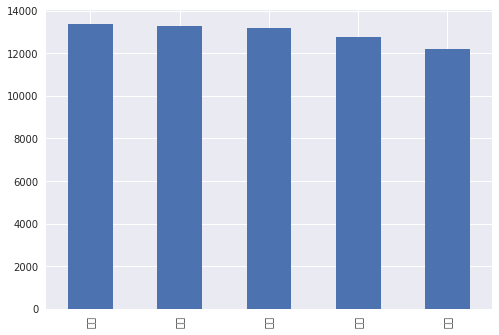

In [ ]:
count_emotion_set = pd.value_counts(emotion_set['Emotion'].values, sort=True)
count_emotion_set.plot.bar()

In [ ]:
# 5emotions_none_set.csv란 이름으로 emotion_set 저장
import os

f_path = 'drive/MyDrive/new_mood/'
f_name = "5emotions_none_set.csv"

# 인덱스 출력X
emotion_set.to_csv(os.path.join(f_path, f_name), index=False)

In [ ]:
# 중복 제거 데이터 확인
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

emotion_set_test = pd.read_csv('/content/drive/MyDrive/new_mood/5emotions_none_set.csv')

Mounted at /content/drive


In [ ]:
emotion_set_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64751 entries, 0 to 64750
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  64751 non-null  object
 1   Emotion   64751 non-null  object
dtypes: object(2)
memory usage: 1011.9+ KB


In [ ]:
print('<emotion_set_test>')
print('분노: ' + str(len(emotion_set_test[emotion_set_test['Emotion']=='분노'])))
print('슬픔: ' + str(len(emotion_set_test[emotion_set_test['Emotion']=='슬픔'])))
print('놀람: ' + str(len(emotion_set_test[emotion_set_test['Emotion']=='놀람'])))
print('중립: ' + str(len(emotion_set_test[emotion_set_test['Emotion']=='중립'])))
print('행복: ' + str(len(emotion_set_test[emotion_set_test['Emotion']=='행복'])))

<emotion_set_test>
분노: 13159
슬픔: 12742
놀람: 12199
중립: 13367
행복: 13284


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_

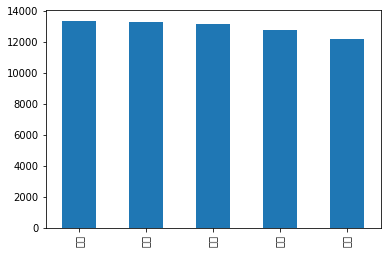

In [ ]:
count_emotion_set = pd.value_counts(emotion_set_test['Emotion'].values, sort=True)
count_emotion_set.plot.bar()

In [ ]:
# 반복문자 정제
import re
from soynlp.normalizer import *

In [ ]:
def cleaning2(line):
    refinedText = repeat_normalize(line, num_repeats=2) # 반복 문자 정제(ex) ㅋㅋㅋㅋㅋ, ㅎㅎㅎ)
    return refinedText

In [ ]:
emotion_set_test['Sentence'] = emotion_set_test['Sentence'].apply(cleaning)

In [ ]:
import pandas as pd

# 중복된 문장들 제거
emotion_set2 = emotion_set_test.drop_duplicates(ignore_index = True)
emotion_set2

,Sentence,Emotion
0,7로 나온다든데 아니었나,놀람
1,의사양반 내가고자라니!,놀람
2,이 사람 얼굴이 약간 전라도 사람처럼 생겼네,놀람
3,아직도 안잡았냐??,놀람
4,이분 ~~진짜 욕먹는건 이제 신의 영역에 들어선거같다~~ㅋㅋ,놀람
...,...,...
64691,응? 휴대폰이 없다고? 요즘 세상에 별일이네.,놀람
64692,탐정님은 조수씨가 가까이 있으면 아는 거야? 신기한 힘?,놀람
64693,...그거 괜찮긴 한 거야?,놀람
64694,어? 정말요?,놀람


In [ ]:
print('<emotion_set2>')
print('분노: ' + str(len(emotion_set2[emotion_set2['Emotion']=='분노'])))
print('슬픔: ' + str(len(emotion_set2[emotion_set2['Emotion']=='슬픔'])))
print('놀람: ' + str(len(emotion_set2[emotion_set2['Emotion']=='놀람'])))
print('중립: ' + str(len(emotion_set2[emotion_set2['Emotion']=='중립'])))
print('행복: ' + str(len(emotion_set2[emotion_set2['Emotion']=='행복'])))

<emotion_set2>
분노: 13154
슬픔: 12737
놀람: 12166
중립: 13367
행복: 13272


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_

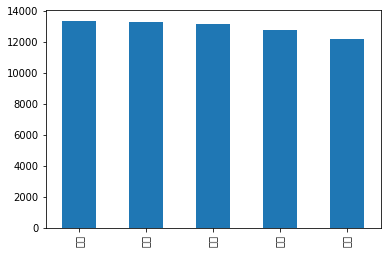

In [ ]:
count_emotion_set = pd.value_counts(emotion_set2['Emotion'].values, sort=True)
count_emotion_set.plot.bar()

In [ ]:
# 5emotions_none_set.csv란 이름으로 emotion_set 저장
import os

f_path = 'drive/MyDrive/new_mood/'
f_name = "5emotions_none_set.csv"

# 인덱스 출력X
emotion_set2.to_csv(os.path.join(f_path, f_name), index=False)

In [ ]:
# 중복 제거 데이터 확인
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

emotion_set_test2 = pd.read_csv('/content/drive/MyDrive/new_mood/5emotions_none_set.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
emotion_set_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64696 entries, 0 to 64695
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  64696 non-null  object
 1   Emotion   64696 non-null  object
dtypes: object(2)
memory usage: 1011.0+ KB


In [ ]:
print('<emotion_set_test2>')
print('분노: ' + str(len(emotion_set_test2[emotion_set_test2['Emotion']=='분노'])))
print('슬픔: ' + str(len(emotion_set_test2[emotion_set_test2['Emotion']=='슬픔'])))
print('놀람: ' + str(len(emotion_set_test2[emotion_set_test2['Emotion']=='놀람'])))
print('중립: ' + str(len(emotion_set_test2[emotion_set_test2['Emotion']=='중립'])))
print('행복: ' + str(len(emotion_set_test2[emotion_set_test2['Emotion']=='행복'])))

<emotion_set_test2>
분노: 13154
슬픔: 12737
놀람: 12166
중립: 13367
행복: 13272


# 개수 균형 대충 맞춰서 온 데이터

In [ ]:
# 중복 제거 데이터 확인
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

emotion_balance = pd.read_csv('/content/drive/MyDrive/new_mood/5emotion_none_norepeat_balance.csv')

Mounted at /content/drive


In [ ]:
emotion_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62568 entries, 0 to 62567
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  62568 non-null  object
 1   Emotion   62568 non-null  object
dtypes: object(2)
memory usage: 977.8+ KB


In [ ]:
print('<emotion_balance>')
print('분노: ' + str(len(emotion_balance[emotion_balance['Emotion']=='분노'])))
print('슬픔: ' + str(len(emotion_balance[emotion_balance['Emotion']=='슬픔'])))
print('놀람: ' + str(len(emotion_balance[emotion_balance['Emotion']=='놀람'])))
print('중립: ' + str(len(emotion_balance[emotion_balance['Emotion']=='중립'])))
print('행복: ' + str(len(emotion_balance[emotion_balance['Emotion']=='행복'])))

<emotion_balance>
분노: 12654
슬픔: 12737
놀람: 12038
중립: 12367
행복: 12772


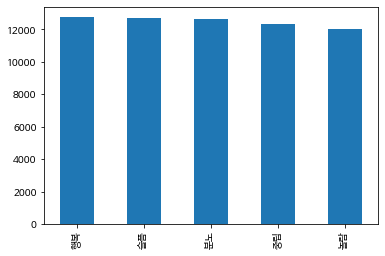

In [ ]:
count_emotion_balance = pd.value_counts(emotion_balance['Emotion'].values, sort=True)
count_emotion_balance.plot.bar()

In [ ]:
# 결측값 정보 출력
emotion_balance.isnull().sum()

Sentence    0
Emotion     0
dtype: int64

## 새 데이터 전처리

In [ ]:
emotion_balance['Sentence'] = emotion_balance['Sentence'].apply(cleaning)

## 중립 제거

In [ ]:
# 중립 Emotion 삭제
index3 = emotion_balance[emotion_balance['Emotion']=='중립'].index
print(index3)
emotion_balance_test = emotion_balance.drop(index3)
emotion_balance_test # 나중에 emotion_balance으로 변경해야함

Int64Index([16752, 16753, 16754, 16755, 16756, 16757, 16758, 16759, 16760,
            16761,
            ...
            59164, 59165, 59166, 59167, 59168, 59169, 59170, 59171, 59172,
            59173],
           dtype='int64', length=12367)


,Sentence,Emotion
0,7로 나온다든데 아니었나,놀람
1,의사양반 내가고자라니!,놀람
2,이 사람 얼굴이 약간 전라도 사람처럼 생겼네,놀람
3,아직도 안잡았냐??,놀람
4,이분 ~~진짜 욕먹는건 이제 신의 영역에 들어선거같다~~ㅋㅋ,놀람
...,...,...
62563,응? 휴대폰이 없다고? 요즘 세상에 별일이네.,놀람
62564,탐정님은 조수씨가 가까이 있으면 아는 거야? 신기한 힘?,놀람
62565,...그거 괜찮긴 한 거야?,놀람
62566,어? 정말요?,놀람


In [ ]:
print('<emotion_balance_test>')
print('분노: ' + str(len(emotion_balance_test[emotion_balance_test['Emotion']=='분노'])))
print('슬픔: ' + str(len(emotion_balance_test[emotion_balance_test['Emotion']=='슬픔'])))
print('놀람: ' + str(len(emotion_balance_test[emotion_balance_test['Emotion']=='놀람'])))
print('행복: ' + str(len(emotion_balance_test[emotion_balance_test['Emotion']=='행복'])))

<emotion_balance_test>
분노: 12654
슬픔: 12737
놀람: 12038
행복: 12772


In [ ]:
emotion_balance_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50201 entries, 0 to 62567
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  50201 non-null  object
 1   Emotion   50201 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [ ]:
# 5emotions_none_noneutral.csv란 이름으로 emotion_set 저장
import os

f_path = 'drive/MyDrive/new_mood/'
f_name = "5emotions_none_noneutral.csv"

# 인덱스 출력X
emotion_balance_test.to_csv(os.path.join(f_path, f_name), index=False)